In [116]:
import pandas as pd
import numpy as np

# импортируем библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

from scipy import stats 

import category_encoders as ce

from geopy.geocoders import Nominatim
from geopy.geocoders import Yandex
import geopy.distance
from geopy import distance

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import time
nltk.downloader.download('vader_lexicon')
from wordcloud import WordCloud

from collections import Counter

from bs4 import BeautifulSoup
import requests

import re

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import f_classif

from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Насим\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Насим\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Насим\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [193]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [117]:
data = pd.read_csv('hotels.csv')
data.head(3)

hotel_address   
0  Stratton Street Mayfair Westminster Borough Lo...  \
1  130 134 Southampton Row Camden London WC1B 5AF...   
2   151 bis Rue de Rennes 6th arr 75006 Paris France   

   additional_number_of_scoring review_date  average_score   
0                           581   2/19/2016            8.4  \
1                           299   1/12/2017            8.3   
2                            32  10/18/2016            8.9   

                          hotel_name reviewer_nationality   
0                 The May Fair Hotel      United Kingdom   \
1    Mercure London Bloomsbury Hotel      United Kingdom    
2  Legend Saint Germain by Elegancia               China    

       negative_review  review_total_negative_word_counts   
0             Leaving                                   3  \
1       poor breakfast                                  3   
2   No kettle in room                                   6   

   total_number_of_reviews      positive_review   
0                     1994   Staff were amazing  \
1                     1361             location   
2                      406          No Positive   

   review_total_positive_word_counts   
0                                  4  \
1                                  2   
2                                  0   

   total_number_of_reviews_reviewer_has_given  reviewer_score   
0                                           7            10.0  \
1                                          14             6.3   
2                                          14             7.5   

                                                tags days_since_review   
0  [' Leisure trip ', ' Couple ', ' Studio Suite ...           531 day  \
1  [' Business trip ', ' Couple ', ' Standard Dou...           203 day   
2  [' Leisure trip ', ' Solo traveler ', ' Modern...           289 day   

         lat       lng  
0  51.507894 -0.143671  
1  51.521009 -0.123097  
2  48.845377  2.325643

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [119]:
print(f'В датасете имеются {data[data.duplicated()].shape[0]} дубликатов')

В датасете имеются 307 дубликатов


In [120]:
data.drop_duplicates(subset=list(data.columns),inplace=True)

In [121]:
print(f'После очистки в датасете осталось {data[data.duplicated()].shape[0]} дубликатов')

После очистки в датасете осталось 0 дубликатов


### Изучение целевого признака

C:\Users\Насим\AppData\Local\Temp\ipykernel_9240\2153954450.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data['reviewer_score'], kde=False, bins=50)


Text(0.5, 1.0, 'Распределение оценки рецензента')

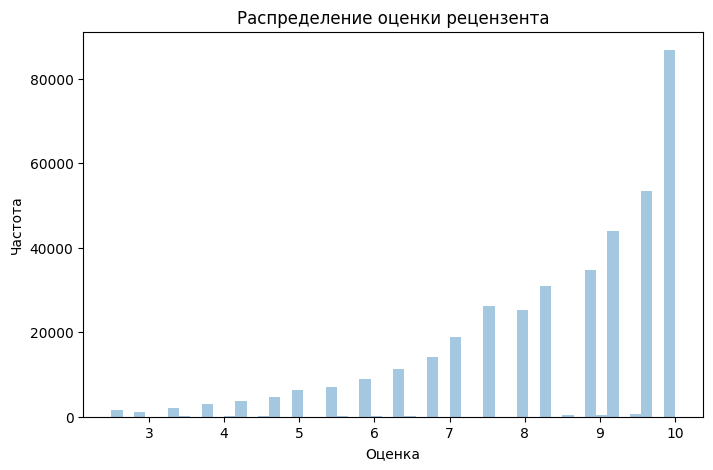

In [122]:
#Построим распределение целевого признака до объеденений датасетов
plt.figure(figsize=(8,5))

ax = sns.distplot(data['reviewer_score'], kde=False, bins=50)
ax.set(xlabel='Оценка', ylabel='Частота')
ax.set_title('Распределение оценки рецензента')


[Text(0, 0.5, 'Количество')]

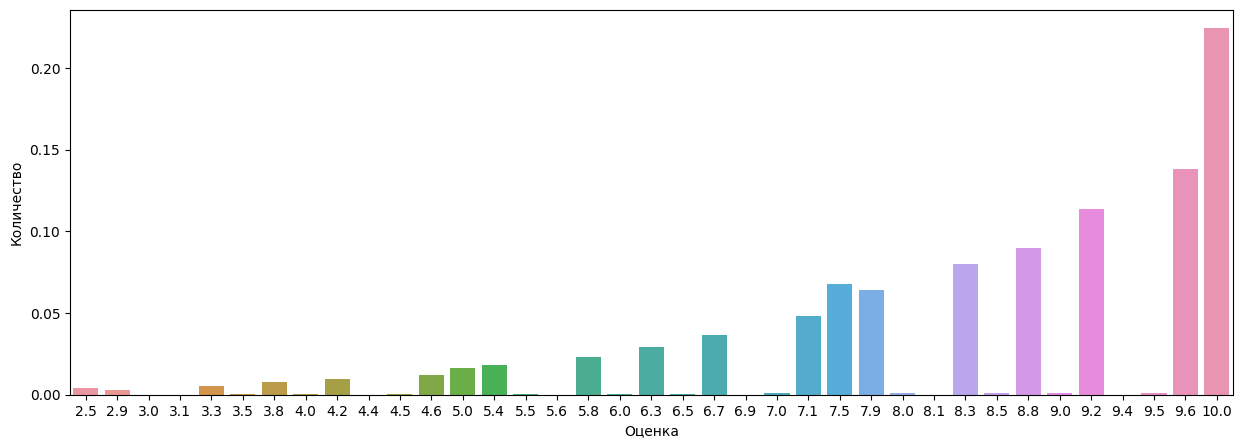

In [123]:
counts = data['reviewer_score'].value_counts(normalize=True).reset_index()

plt.figure(figsize = (15,5))
barplot = sns.barplot(x = counts['reviewer_score'], y = counts['proportion'])
barplot.set(xlabel='Оценка')
barplot.set(ylabel = 'Количество')

[Text(0.5, 1.0, 'Распределение признака рейтинг')]

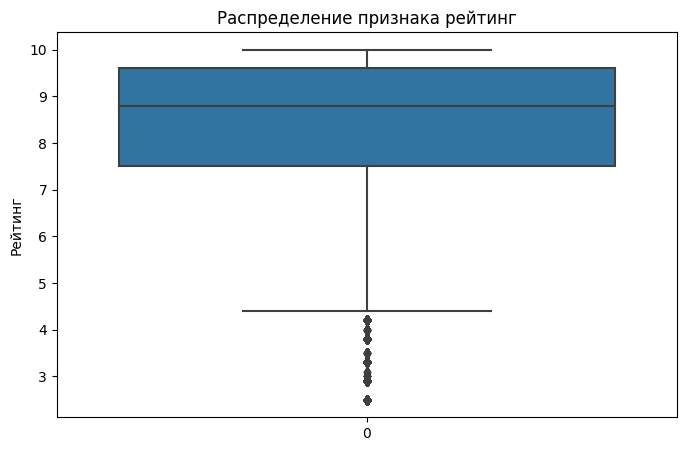

In [124]:
plt.figure(figsize=(8,5))
boxplot = sns.boxplot(data['reviewer_score'])
boxplot.set(ylabel='Рейтинг')
boxplot.set(title = 'Распределение признака рейтинг')

In [125]:
data.describe()

additional_number_of_scoring  average_score   
count                 386496.000000  386496.000000  \
mean                     498.504375       8.397421   
std                      500.365093       0.547861   
min                        1.000000       5.200000   
25%                      169.000000       8.100000   
50%                      342.000000       8.400000   
75%                      660.000000       8.800000   
max                     2682.000000       9.800000   

       review_total_negative_word_counts  total_number_of_reviews   
count                      386496.000000            386496.000000  \
mean                           18.539400              2744.679231   
std                            29.703569              2316.934876   
min                             0.000000                43.000000   
25%                             2.000000              1161.000000   
50%                             9.000000              2134.000000   
75%                            23.000000              3633.000000   
max                           408.000000             16670.000000   

       review_total_positive_word_counts   
count                      386496.000000  \
mean                           17.778163   
std                            21.724766   
min                             0.000000   
25%                             5.000000   
50%                            11.000000   
75%                            22.000000   
max                           395.000000   

       total_number_of_reviews_reviewer_has_given  reviewer_score   
count                               386496.000000   386496.000000  \
mean                                     7.176211        8.397299   
std                                     11.052453        1.635747   
min                                      1.000000        2.500000   
25%                                      1.000000        7.500000   
50%                                      3.000000        8.800000   
75%                                      8.000000        9.600000   
max                                    355.000000       10.000000   

                 lat            lng  
count  384048.000000  384048.000000  
mean       49.443988       2.823740  
std         3.468266       4.580782  
min        41.328376      -0.369758  
25%        48.214277      -0.143649  
50%        51.500198      -0.000250  
75%        51.516384       4.834443  
max        52.400181      16.429233

**По графикам видно, что в основном оценки ставятся высокие: 9.2,9.6,10.0**
**При просмтре описательной статистики, и изучения целевого признака каких-либо аномалий не выявлено**

### Некоторые преобразования перед анализом датасета

In [126]:
# переведем количество дней в промежутке между проверки и очистки в числовой формат
data['days_since_review'] = data['days_since_review'].apply(lambda x: x.split()[0])
data['days_since_review'] = data['days_since_review'].astype('int64')

#Выделим из признака адреса признаки страну и город
data['country'] = data['hotel_address'].apply(lambda x: x.split()[-2] + ' ' + x.split()[-1] if x.split()[-1] == 'Kingdom' else x.split()[-1])
data['city'] = data['hotel_address'].apply(lambda x: x.split()[-5] if x.split()[-1] == 'Kingdom' else x.split()[-2])

# переведем дату оценки в формат времени и отдельно выделим день и месяц
data['day'] =  pd.to_datetime(data['review_date']).dt.weekday
data['month'] = pd.to_datetime(data['review_date']).dt.month
data['review_date'] = pd.to_datetime(data['review_date'])

Text(0.5, 1.0, 'Тепловая карта корреляции')

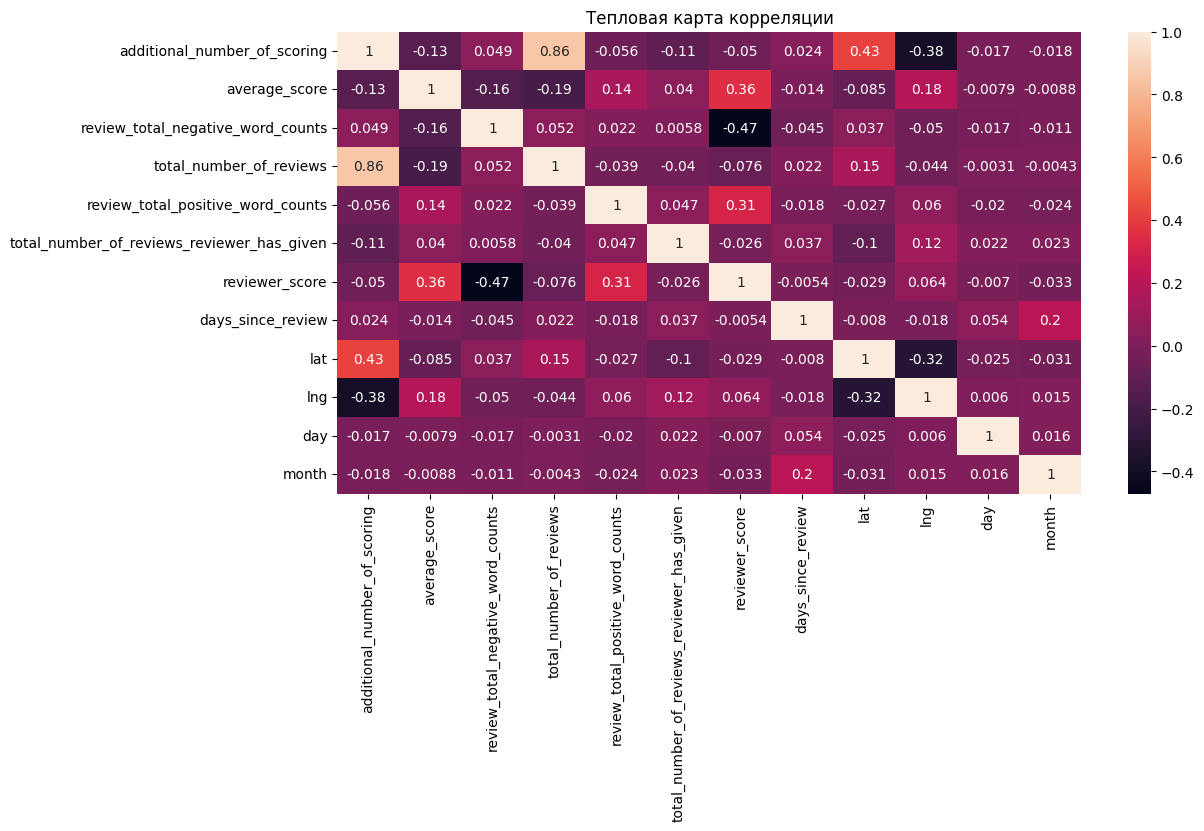

In [127]:
#Отберем только числовые столбцы для построения тепловой карты корреляции
result=data.select_dtypes(include='number')
plt.figure(figsize=(12,6))
sns.heatmap(result.corr(method='spearman'),annot=True)
plt.title('Тепловая карта корреляции')


**Целевой признак прямо коррелирует с средним баллом отеля, рассчитанным на основе последнего комментария за последний год (average score), общим количествов слов в положительном отзыве (review_total_positive_word_counts), обратно коррелирует с  общим количеством слов в отрицательном отзыве (review_total_negative_word_counts)**

### Изучение признаков

#### Дата

[Text(0, 0, 'Tue'),
 Text(1, 0, 'Sun'),
 Text(2, 0, 'Mon'),
 Text(3, 0, 'Thur'),
 Text(4, 0, 'Wed'),
 Text(5, 0, 'Sat'),
 Text(6, 0, 'Fri')]

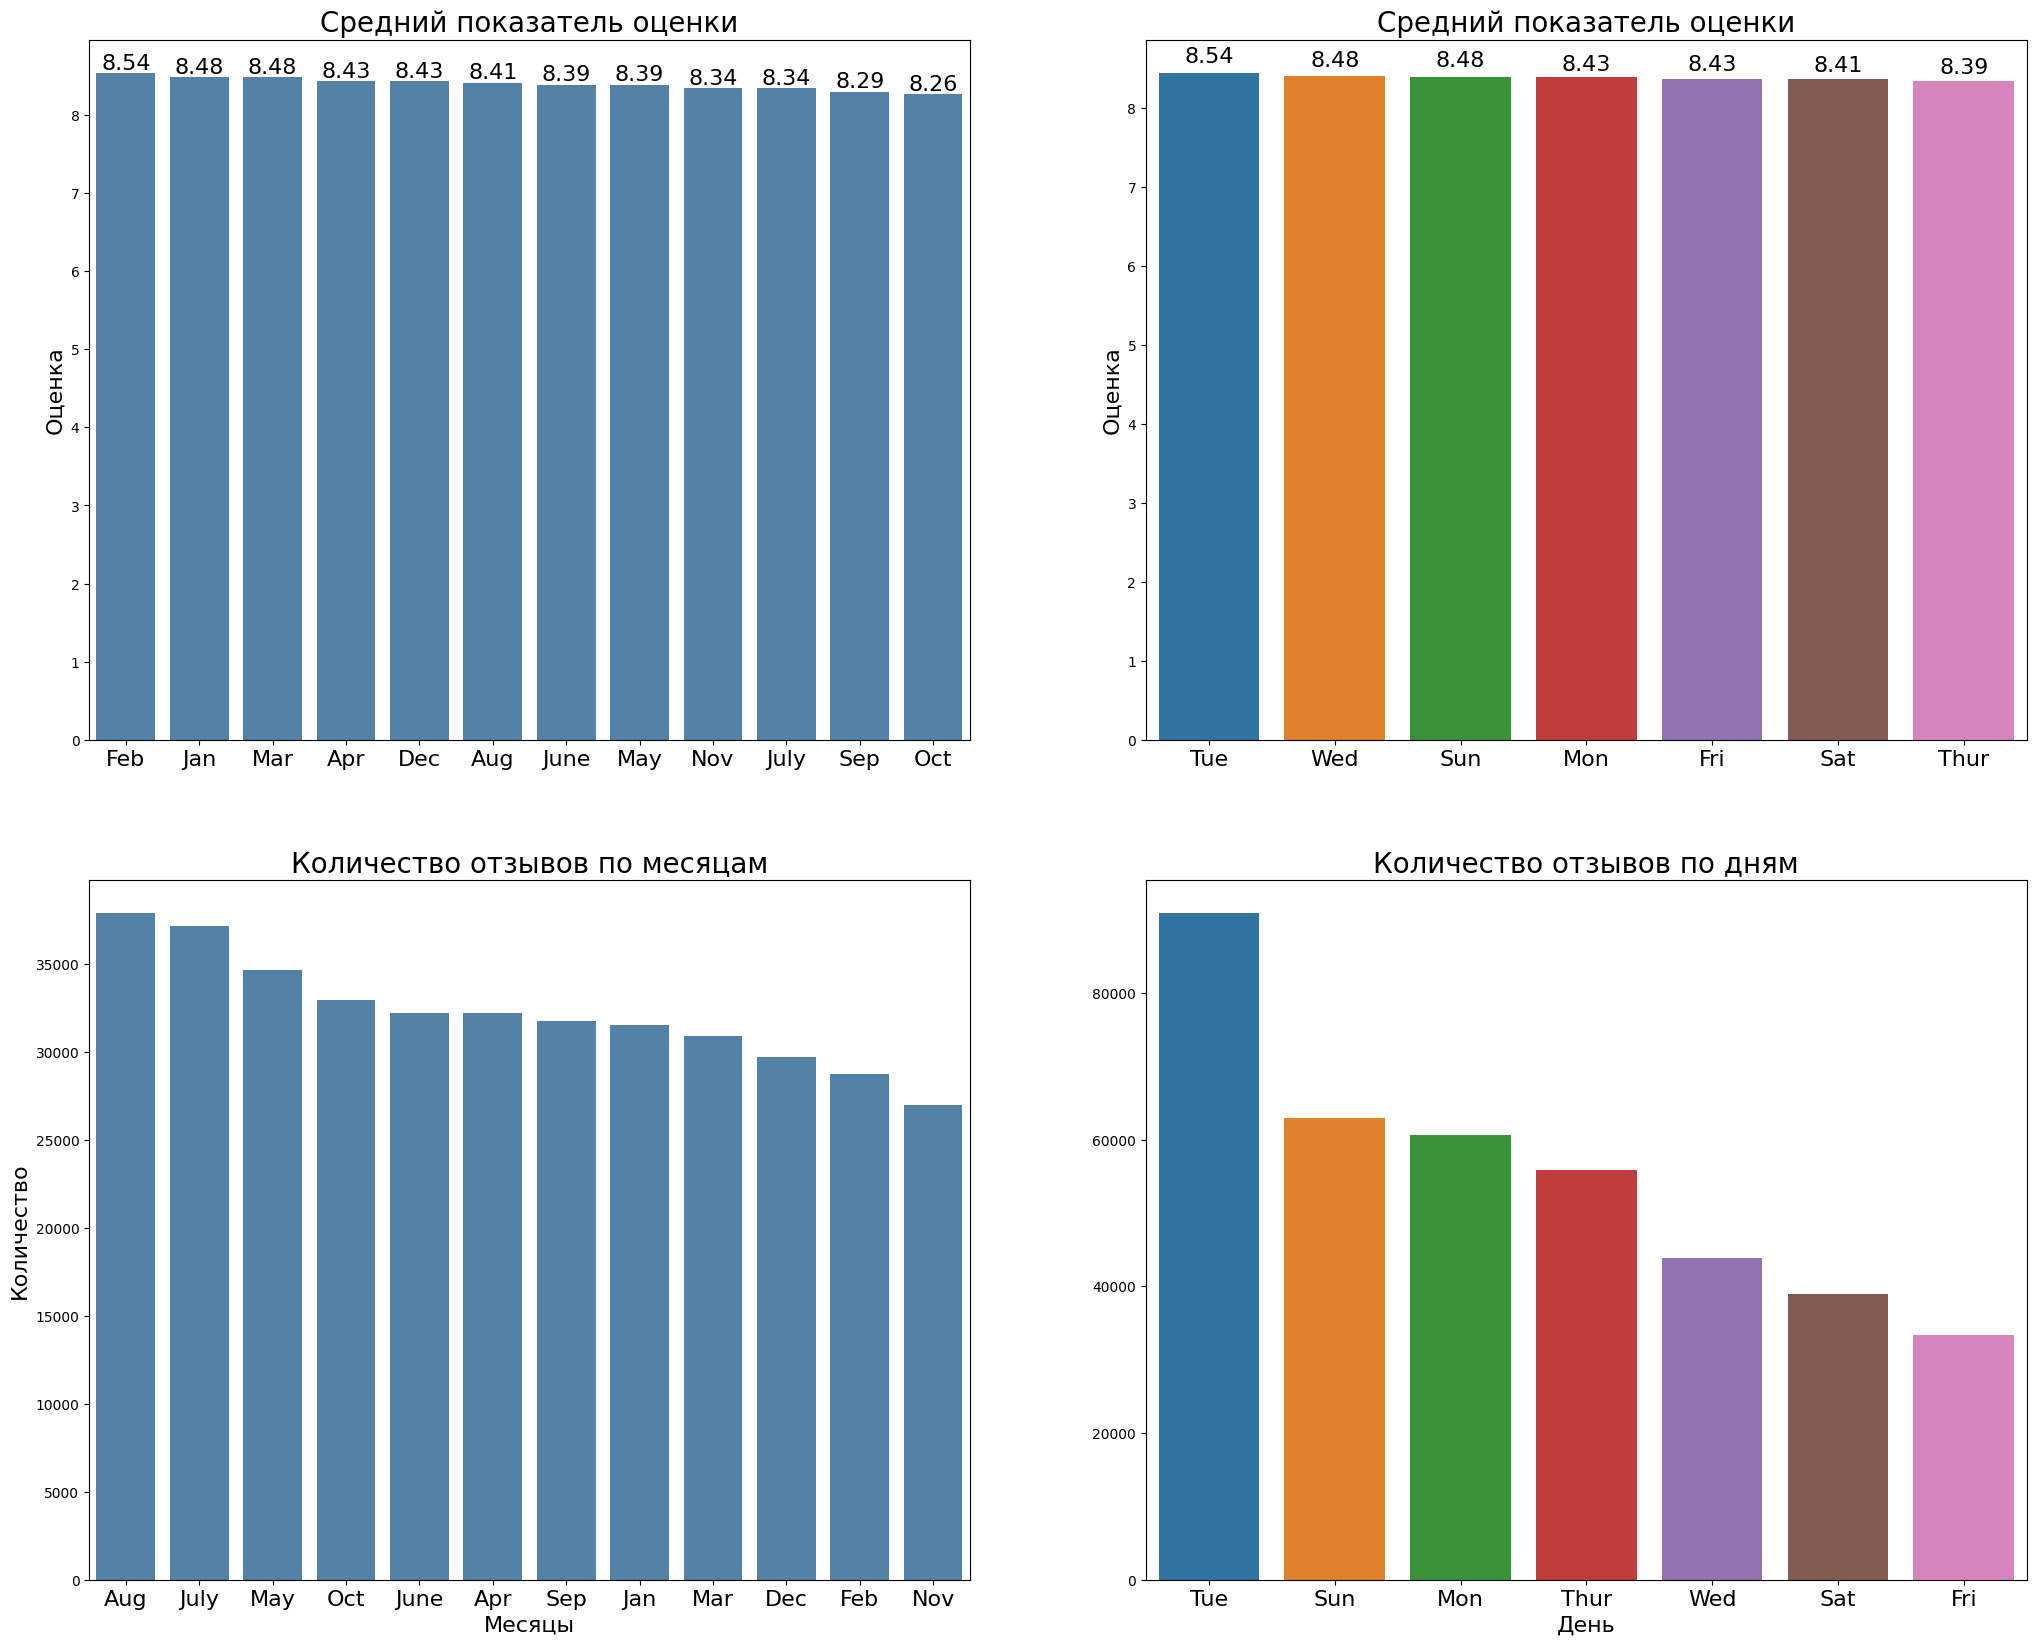

In [128]:
#Создадим датафрейм со среденей оценкой по месяцам
month = data.groupby(['month'])['reviewer_score'].mean().reset_index().\
sort_values(by='reviewer_score',ascending=False).\
replace([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep',\
'Oct','Nov','Dec'])

#Датафрейм со средней оценкой по дням недели
week = data.groupby(['day'])['reviewer_score'].mean().reset_index().\
sort_values(by='reviewer_score',ascending=False).\
replace([0,1,2,3,4,5,6],['Mon','Tue','Wed','Thur','Fri','Sat','Sun'])

#Создади плоскость, на которой разместим 4 столбчатых диаграмм
fig, axes = plt.subplots(2, 2, figsize=(25, 20))

#Визуализация средней оценки по месяцам
sns.barplot(data=month, x='month',y='reviewer_score',ax=axes[0,0], color = 'steelblue')
for p in axes[0,0].patches:
    axes[0,0].annotate(
        '{:.2f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
    ha='center', va='bottom', fontsize=16)
axes[0,0].set_title('Средний показатель оценки', fontsize = 20)
axes[0,0].set_xlabel('')
axes[0,0].set_ylabel('Оценка',fontsize=16)
axes[0,0].set_xticklabels(month['month'],fontsize=16)

#Визуализация средней оценки по дням недели
sns.barplot(data=week, x='day',y='reviewer_score',ax=axes[0,1])
for p in axes[0,0].patches:
    axes[0,1].annotate(
        '{:.2f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
    ha='center', va='bottom', fontsize=16)
axes[0,1].set_title('Средний показатель оценки', fontsize = 20)
axes[0,1].set_xlabel('')
axes[0,1].set_ylabel('Оценка',fontsize=16)
axes[0,1].set_xticklabels(week['day'],fontsize=16)

#Датафрейм с количеством выставленных оценок по месяцам
month_count = data.groupby(['month'])['reviewer_score'].count().reset_index().\
sort_values(by='reviewer_score',ascending=False).\
replace([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep',\
'Oct','Nov','Dec'])

#Датафрейм с количеством выставленных оценок по дням недели
week_count = data.groupby(['day'])['reviewer_score'].count().reset_index().\
sort_values(by='reviewer_score',ascending=False).\
replace([0,1,2,3,4,5,6],['Mon','Tue','Wed','Thur','Fri','Sat','Sun'])

#Диаграмма с количеством выставленных оценок по месяцам
sns.barplot(data=month_count, x='month',y='reviewer_score',ax=axes[1,0],color = 'steelblue')
axes[1,0].set_title('Количество отзывов по месяцам', fontsize = 20)
axes[1,0].set_xlabel('Месяцы', fontsize=16)
axes[1,0].set_ylabel('Количество',fontsize=16)
axes[1,0].set_xticklabels(month_count['month'],fontsize=16)

#Диаграмма с количеством выставленных оценок по дням недели
sns.barplot(data=week_count, x='day',y='reviewer_score',ax=axes[1,1])
axes[1,1].set_title('Количество отзывов по дням', fontsize = 20)
axes[1,1].set_xlabel('День', fontsize=16)
axes[1,1].set_ylabel('')
axes[1,1].set_xticklabels(week_count['day'],fontsize=16)


**Чуть выше средние баллы выставляются в феврале, январе, марте, возможно связано с тем, что в несезон персонал, да и весь сервис отелей успевает удовлетворить должным образом потребности гостей. По дням недели чуть выше оценка выставляется во вторник, в целом отзывы размещаются чаще всего во вторник. Месяцы и дни оставим в порядковом виде.**  

In [129]:
print(f"Самый свежий отзыв был оставлен {data['review_date'].reset_index().sort_values(by='review_date',ascending=False).iloc[0,1]}")
print(f"Самый первый отзыв был оставлен {data['review_date'].reset_index().sort_values(by='review_date',ascending=False).iloc[-1,1]}")

Самый свежий отзыв был оставлен 2017-08-03 00:00:00
Самый первый отзыв был оставлен 2015-08-04 00:00:00


In [130]:
data.drop(columns=['review_date'],inplace=True)

#### Отель


Text(0, 0.5, '')

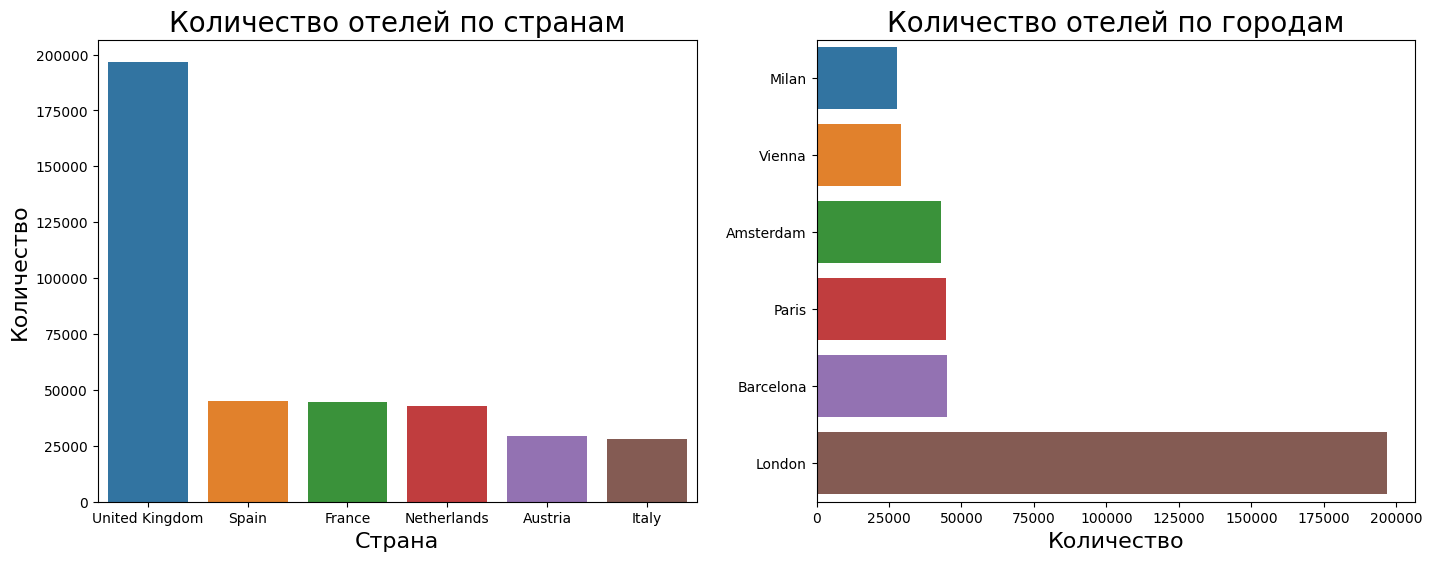

In [131]:
geo = data[['city','country']].value_counts(ascending=False).\
reset_index().rename(columns={0:'count'})

fig, axes = plt.subplots(1,2, figsize=(17,6))
sns.barplot(x='country', y='count',data = geo, ax = axes[0])
axes[0].set_title('Количество отелей по странам', fontsize = 20)
axes[0].set_xlabel('Страна', fontsize=16)
axes[0].set_ylabel('Количество',fontsize=16)

sns.barplot(y='city', x='count',  data = geo[::-1], ax = axes[1])
axes[1].set_title('Количество отелей по городам', fontsize = 20)
axes[1].set_xlabel('Количество', fontsize=16)
axes[1].set_ylabel('',fontsize=16 )

In [132]:
print(f"Всего в датасете представлено {data['hotel_name'].nunique()} отелей")
print(f"В Великобритании располагаются {data[data['country'] == 'United Kingdom']['hotel_name'].nunique()} уникальных отелей")
print(f"В Испании располагаются {data[data['country'] == 'Spain']['hotel_name'].nunique()} уникальных отелей")
print(f"Во Франции располагаются {data[data['country'] == 'France']['hotel_name'].nunique()} уникальных отелей")
print(f"В Нидерландах располагаются {data[data['country'] == 'Netherlands']['hotel_name'].nunique()} уникальных отелей")
print(f"В Австрии располагаются {data[data['country'] == 'Austria']['hotel_name'].nunique()} уникальных отелей")
print(f"В Италии располагаются {data[data['country'] == 'Italy']['hotel_name'].nunique()} уникальных отелей")

Всего в датасете представлено 1492 отелей
В Великобритании располагаются 400 уникальных отелей
В Испании располагаются 211 уникальных отелей
Во Франции располагаются 458 уникальных отелей
В Нидерландах располагаются 105 уникальных отелей
В Австрии располагаются 158 уникальных отелей
В Италии располагаются 162 уникальных отелей


In [133]:
print(f'Широта и долгота по датасету пропущены у отелей в количестве {data[data["lat"].isnull()]["hotel_name"].nunique()}')

Широта и долгота по датасету пропущены у отелей в количестве 17


In [134]:
#Кодируем признак страны, чтобы он был пригоден для обучения
encoder = ce.OneHotEncoder(cols=['country'],use_cat_names=True)
type_bin = encoder.fit_transform(data['country'])
data = pd.concat([data,type_bin], axis=1)

#### Создание и изучение признака расстояния до центра города

In [135]:
# Найдем отели с пропущенными координатами
hotel_list = list(data[data['lat'].isnull()]['hotel_name'].unique())

# Мной вручную были собраны отсутствующие координаты
lat_lng = [(48.219740932212275, 16.285613554864376), 
           (48.88912080396763, 2.333174454899179), 
           (48.211938450140735, 16.351965219189402), 
           (48.22068915294034, 16.35581859719365), 
           (48.875500736185465, 2.323391997227697), 
           (48.246203832893556, 16.341254154865734), 
           (48.2138085966115, 16.379908197193316), 
           (41.391821632136306, 2.177893996860464), 
           (48.22099483517749, 16.36661149719372), 
           (48.1889792825954, 16.383790026027413), 
           (48.226363046200355, 16.393162729375284), 
           (48.21699973647868, 16.359894968358084),
           (48.84017434204236, 2.3235963177157544),
           (48.29104529139163, 16.331524757323297),
           (41.38505345572797, 2.160958547174369), 
           (41.39287804039595, 2.1674405122019906),
           (48.20958099423345, 16.351458857932162)]
#Объеденим в словарь отели и координаты
lat_lng_dict = dict(zip(hotel_list,lat_lng))

#Заменим через цикл пустые значения
for i in range(len(data)):
    for key in lat_lng_dict:
        if data['hotel_name'].iloc[i] == key:
            data['lat'].iloc[i] = lat_lng_dict[key][0]
            data['lng'].iloc[i] = lat_lng_dict[key][1]

C:\Users\Насим\AppData\Local\Temp\ipykernel_9240\1481608329.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['lat'].iloc[i] = lat_lng_dict[key][0]
C:\Users\Насим\AppData\Local\Temp\ipykernel_9240\1481608329.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['lng'].iloc[i] = lat_lng_dict[key][1]
C:\Users\Насим\AppData\Local\Temp\ipykernel_9240\1481608329.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['lat'].il

In [136]:
#Также в ручную соберем координаты центра города по городам датасета
distance = {'London' : [51.5085300, -0.1257400],
           'Paris': [48.8534100, 2.3488000],
           'Amsterdam': [52.3740300, 4.8896900],
           'Milan': [45.4642700, 9.1895100],
           'Vienna': [48.2084900, 16.3720800],
           'Barcelona': [41.3887900, 2.1589900]}


In [137]:

#С помощью модуля geopy найдем расстояния от центра города до местанахождения каждого отеля
def distance_feature(city, lat, lng):
    return geopy.distance.geodesic([distance[city][0], 
                                    distance[city][1]],
                                   [lat, lng]).km
data['distance'] = data.apply(lambda x:
                                distance_feature(x['city'], x['lat'], x['lng']),axis = 1)

Text(0, 0.5, '')

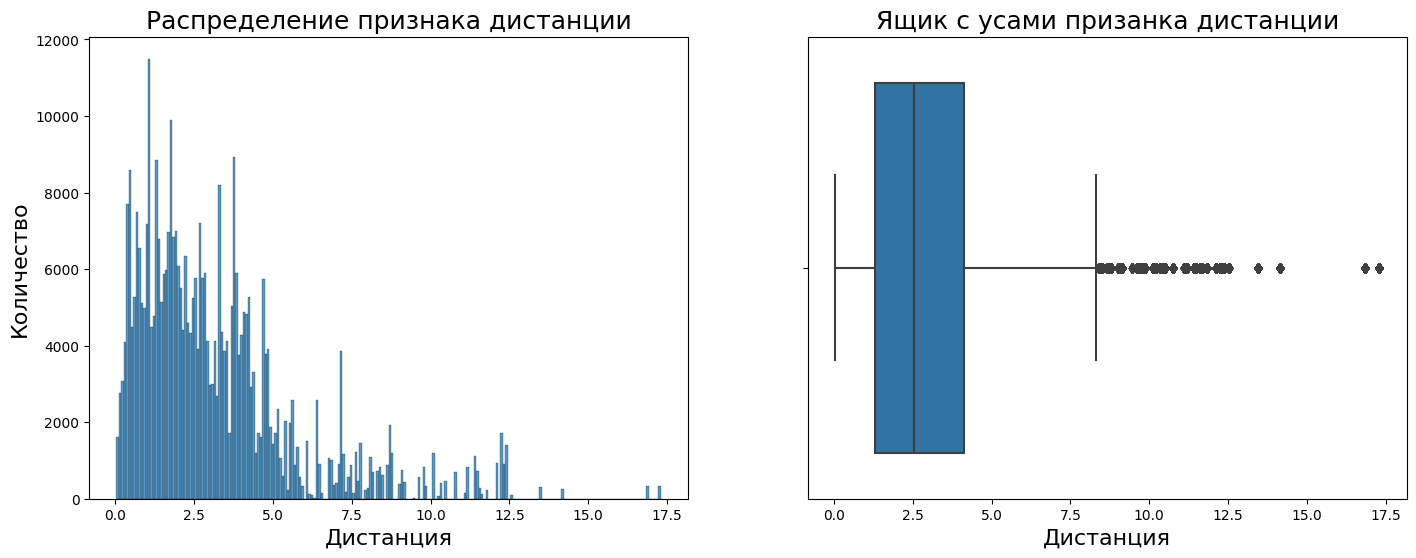

In [138]:
fig, axes = plt.subplots(1,2, figsize=(17,6))
sns.histplot(data = data, x='distance', ax=axes[0])
axes[0].set_title('Распределение признака дистанции', fontsize = 18)
axes[0].set_xlabel('Дистанция', fontsize=16)
axes[0].set_ylabel('Количество',fontsize=16)

sns.boxplot(data = data, x='distance', ax=axes[1])
axes[1].set_title('Ящик с усами призанка дистанции', fontsize = 18)
axes[1].set_xlabel('Дистанция', fontsize=16)
axes[1].set_ylabel('',fontsize=16)

In [139]:
data['distance'].describe()

count    386496.000000
mean          3.158111
std           2.573141
min           0.030637
25%           1.315118
50%           2.547625
75%           4.125059
max          17.302738
Name: distance, dtype: float64

**Непохоже, что данные обладают какими либо аномальными значениями, поэтому оставляем признак как есть**

In [140]:
#Теперь, когда получили признак расстояния до центра, можно удалить столбцы, не влияющие на анлиз
data.drop(columns=['lat','lng','hotel_address','city'],inplace=True)

Text(0.5, 1.0, 'Взаимосвязь между расстоянием от центра и оценкой')

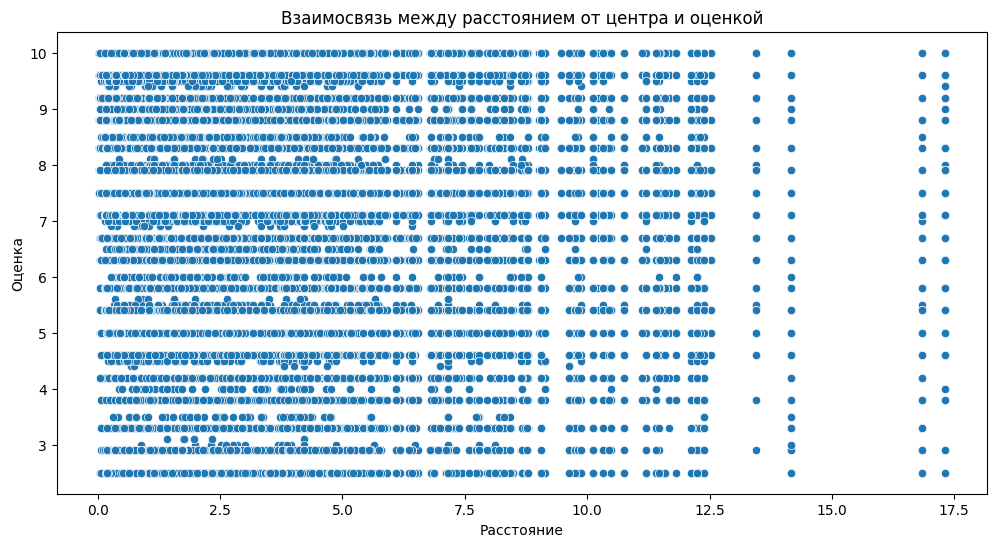

In [141]:
plt.figure(figsize=(12,6))
sns.scatterplot(x = data['distance'],y= data['reviewer_score'])
plt.xlabel('Расстояние')
plt.ylabel('Оценка')
plt.title('Взаимосвязь между расстоянием от центра и оценкой')

**Взаимосвязь между расстоянием от центра города до отеля и оценкой не прослеживается**

#### Национальность рецензентов

Text(0.5, 0, 'Страны')

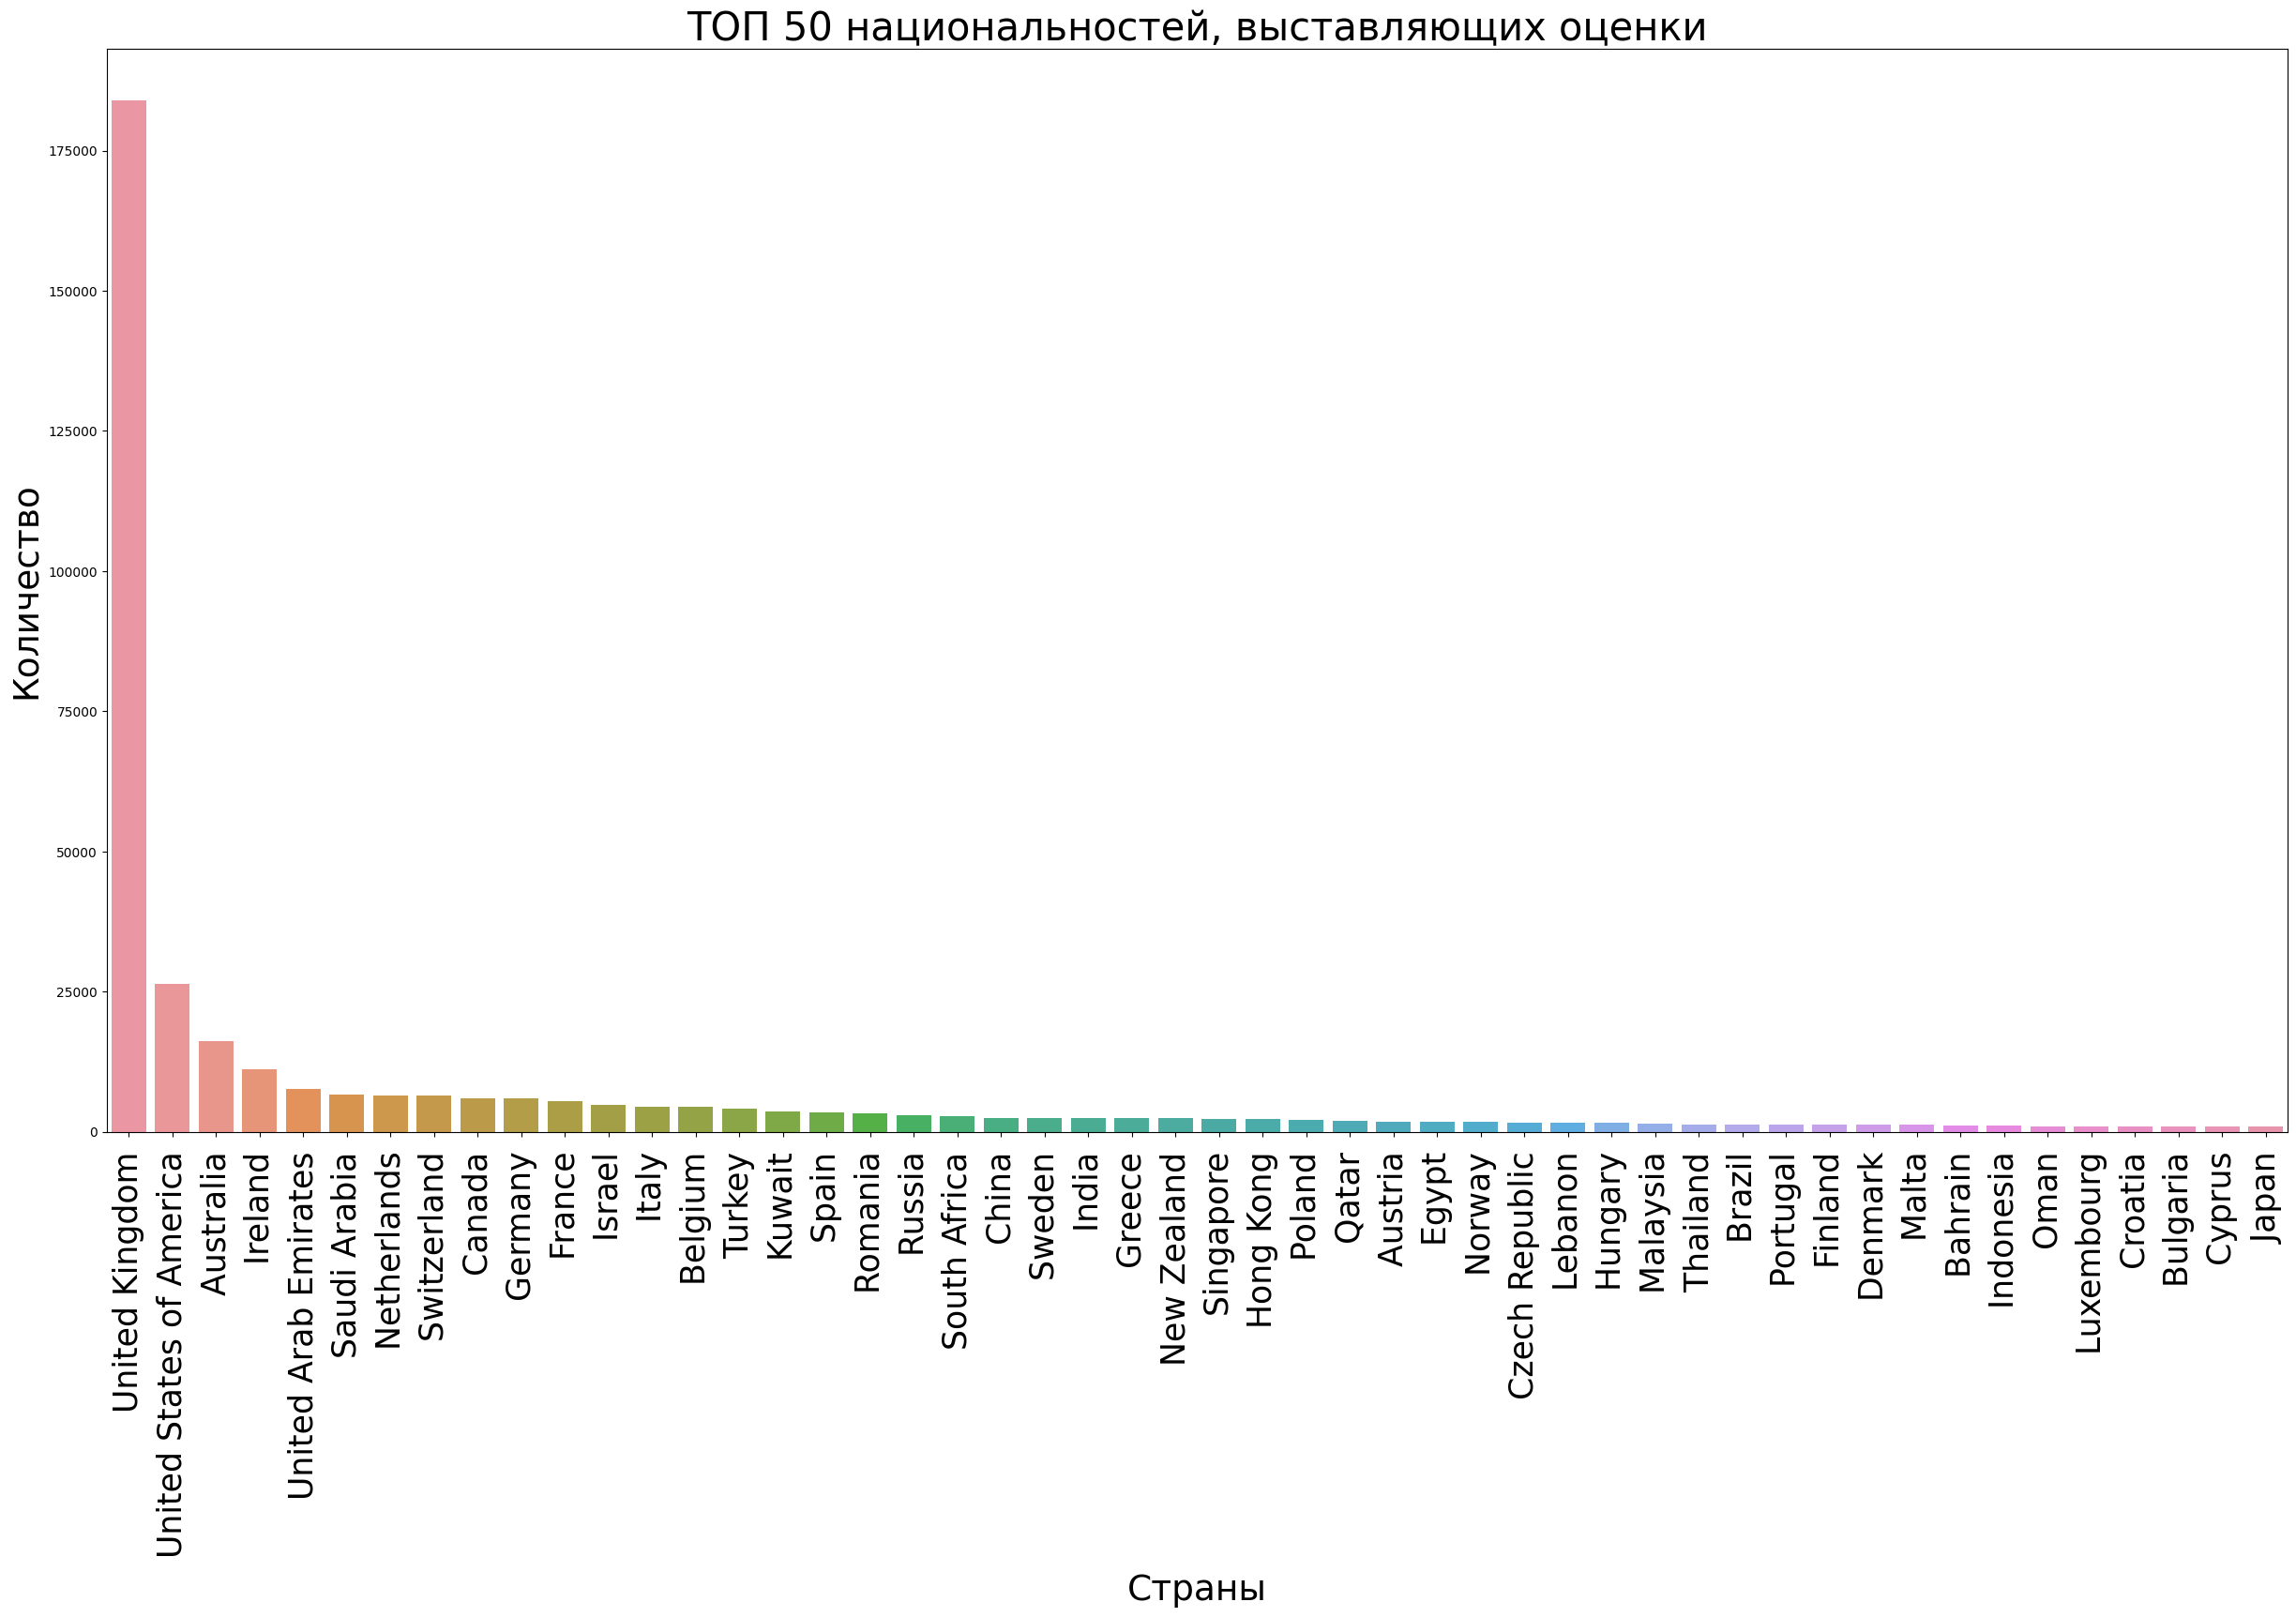

In [142]:
reviewers = data['reviewer_nationality'].value_counts()[:50]
fig = plt.figure(figsize=(30,15))
bar = sns.barplot(data = reviewers,
             x=reviewers.index[::-1],
             y=reviewers.values)
bar.set_xticklabels(reviewers.index, rotation = 90, fontsize=25)
bar.set_title('ТОП 50 национальностей, выставляющих оценки',fontsize=30)
bar.set_ylabel('Количество',fontsize=27)
bar.set_xlabel('Страны',fontsize=27)


Text(0.5, 0, '')

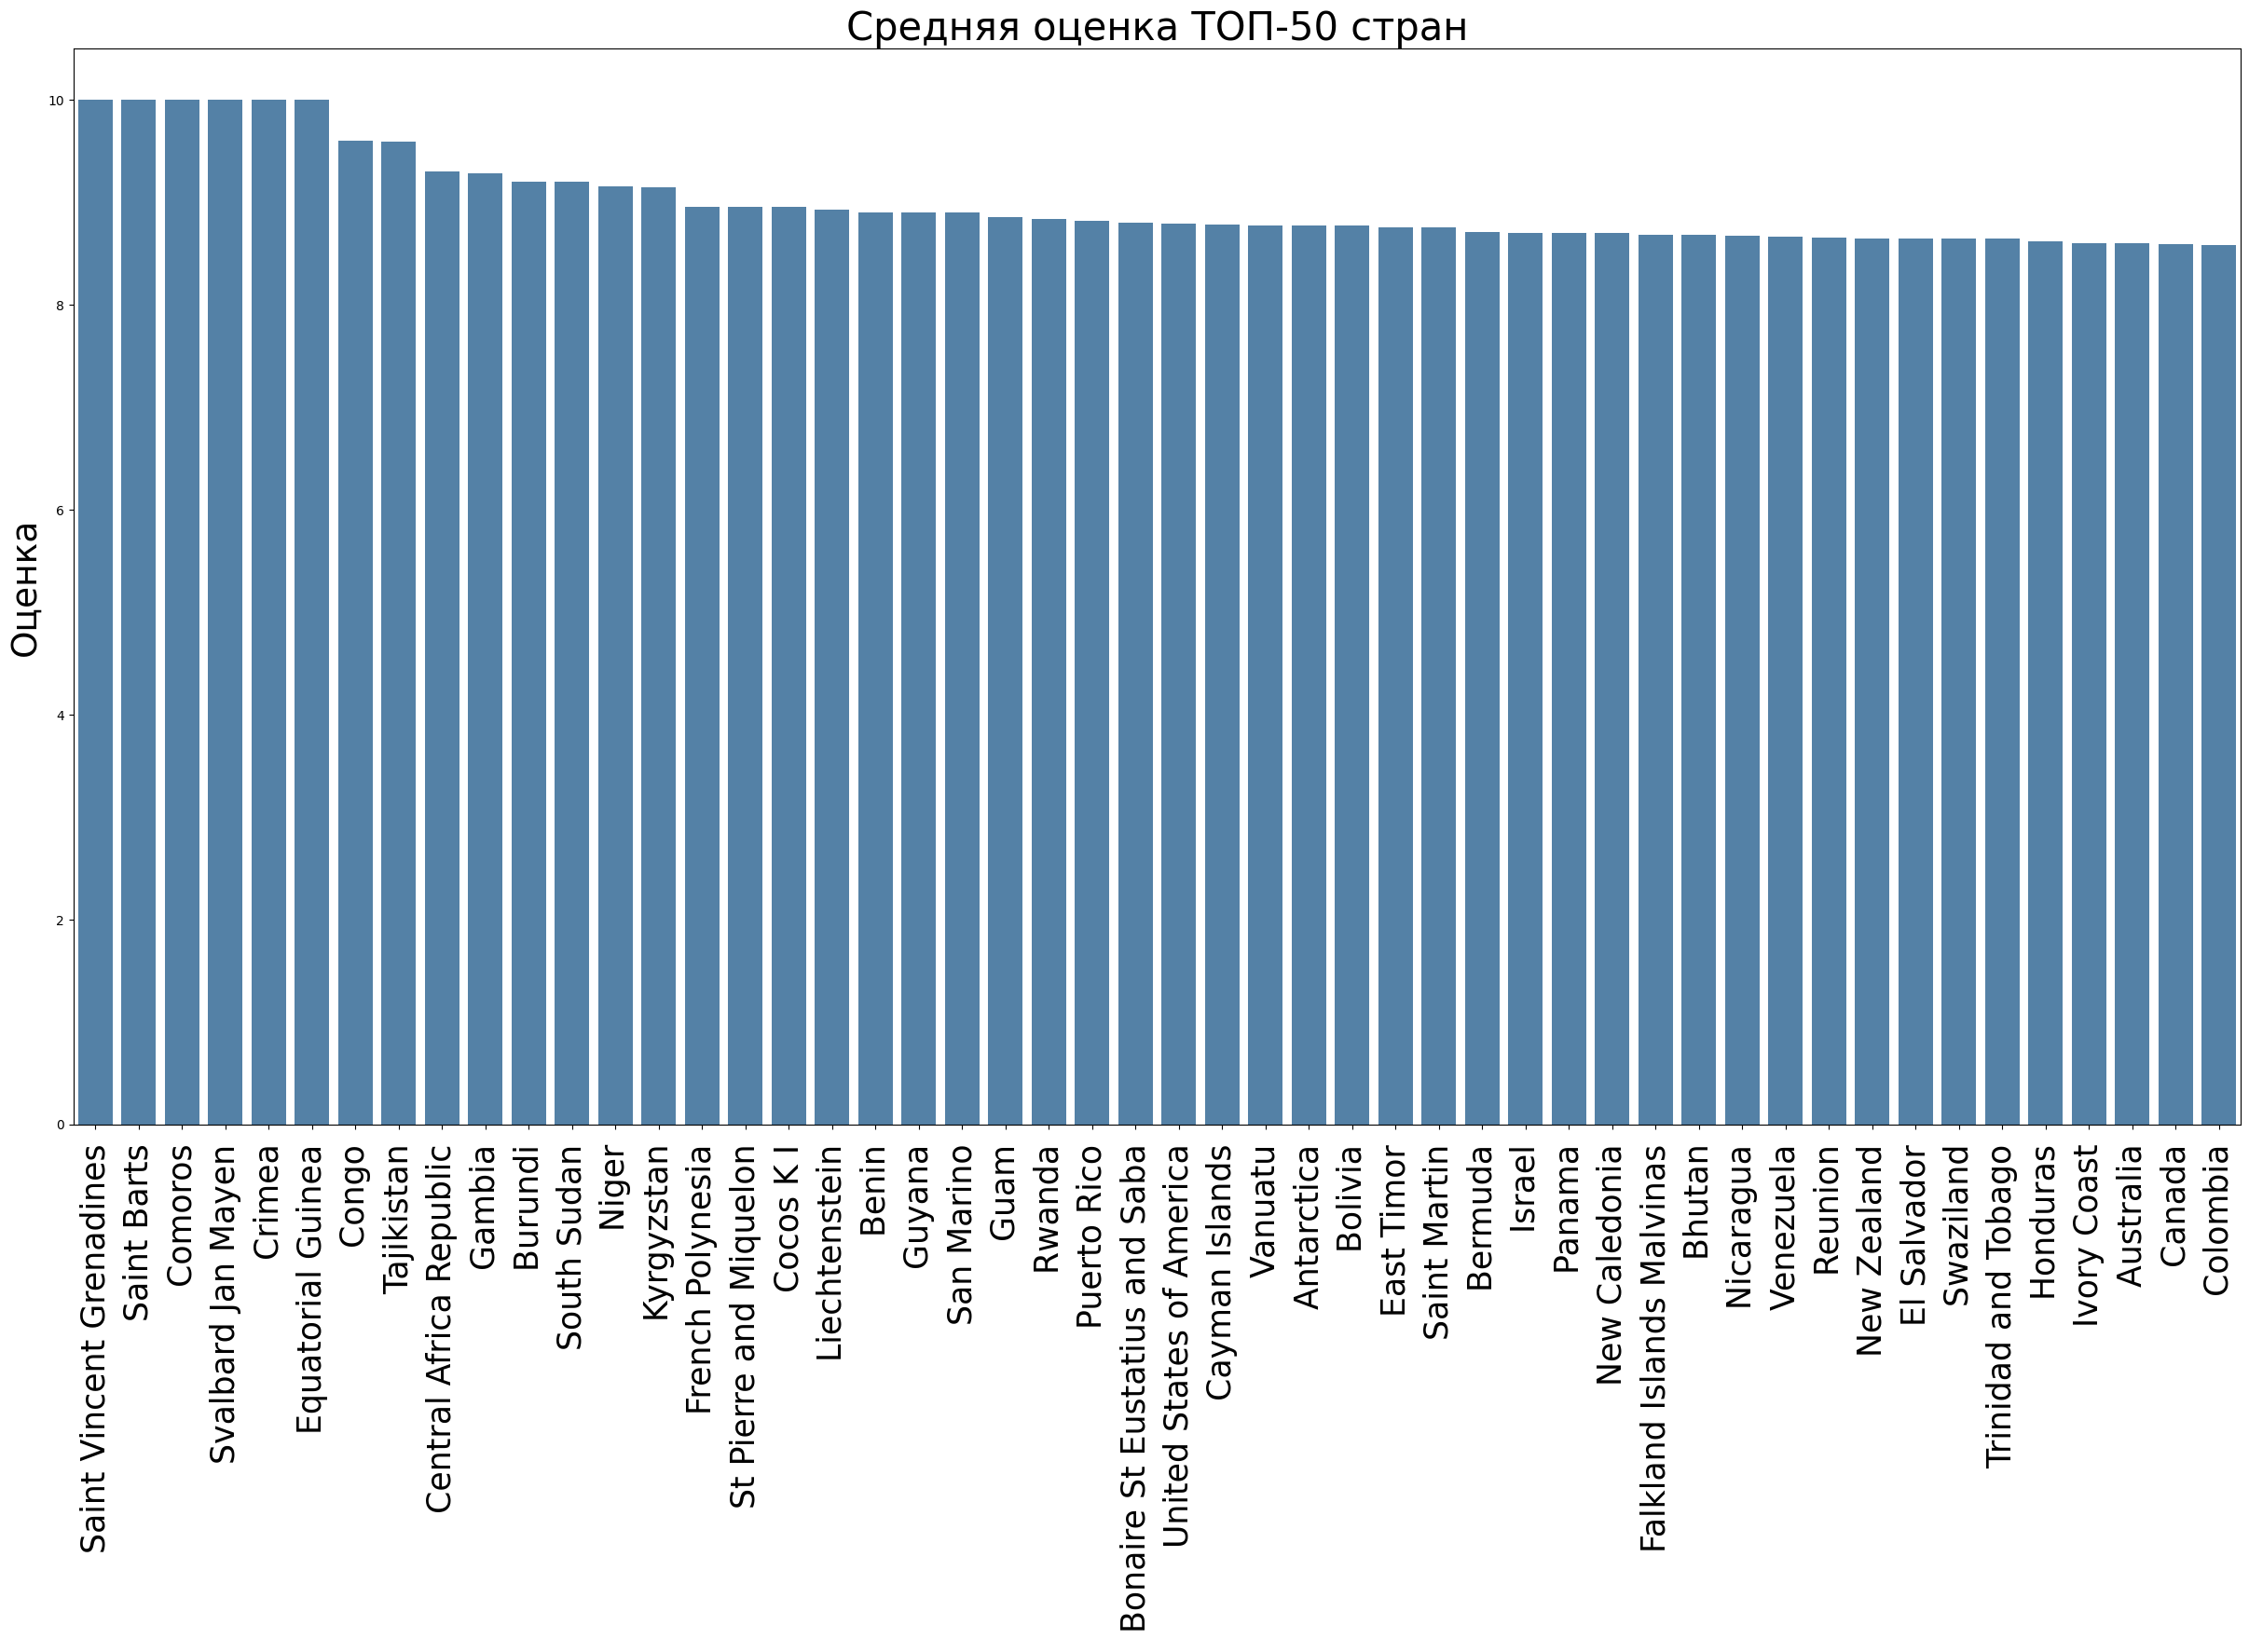

In [143]:
df = data.groupby('reviewer_nationality')['reviewer_score'].mean().reset_index().sort_values(by='reviewer_score',ascending=False)[:50]
fig = plt.figure(figsize=(30,15))
plot = sns.barplot(data=df, x='reviewer_nationality',y='reviewer_score', color='steelblue')
plot.set_xticklabels(df['reviewer_nationality'], rotation = 90, fontsize=25)
plot.set_title('Средняя оценка ТОП-50 стран',fontsize=30)
plot.set_ylabel('Оценка',fontsize=27)
plot.set_xlabel('')


In [144]:
#Удалим лишние пробелы в признаке национальность рецензентов
data['reviewer_nationality'] = data['reviewer_nationality'].apply(lambda x:x.strip())

#### **Найдем новый признак "индекс счастья в странах, чьи представители оставляли рецензии, поскольку может от данного индекса зависит постановки оценки отелю:**

In [145]:
#для этого обратимся к сайту википедии, однако там представлены индексы не по всем странам датасета
url = 'https://en.wikipedia.org/wiki/World_Happiness_Report'
#обратимся к библиотекам requests и bs4
page = requests.get(url)
soup = BeautifulSoup(page.text, "html.parser")
#поскольку брать информацию с сайта википедии несколько неудобно, буду использовать методы python для очистки данных
container = soup.findAll('td')
all = []
for elem in container:
    if elem.find('a') is not None: 
        all.append(elem.find('a').text)
        
#Получим список стран, по которым, будем в дальнейшем присоединять полученные данные с нашим датасетом        
countries = all[798:955]
countries[107] = 'Palestinian Territories'
countries[76] = 'Kosovo'
countries[96] = 'Somaliland region'

#Далее, используя python путем всевозможных очисток будем получать список индекс счастья - 'happiness' 
links = [item.text for item in container]


pat = re.compile(r'^[0-9]*[.,]{0,1}[0-9]*$')

happiness = []
for item in links:
    if pat.match(item):
        happiness.append(item)

for i in range(len(happiness)):
        happiness[i] = happiness[i].replace('\n','')

happiness = [l for l in happiness if len(l)>3]
happiness = happiness[4495:4652]
happiness = [round(float(elem),2) for elem in happiness]

#После разного рода преобразований, получим датафрейм страна - индекс счастья
happy_df = pd.DataFrame({'countries': countries, 'index_of_happiness':happiness})

In [146]:
#Чтобы максимально подогнать полученный датафрейм с нашим, выпылним замену некоторых значений на значения нашего датафрейма
happy_df['countries'] = happy_df['countries'].\
replace({"People's Republic of China":'China','United States':'United States of America',
        'North Macedonia':'Macedonia','Republic of the Congo': 'Congo',
        'Palestinian Territories':'Palestinian Territory'})

In [147]:
#Присоеденим полученный и преобразованный датафрейм с нашим датафреймом (столбцы национальность-рецензента - страна по индексу счастья)
data = pd.merge(data, happy_df, how = 'left',left_on='reviewer_nationality', \
                right_on='countries')

#### **Поскольку имеются пропущенные значения, из за того что на википедии представлены не все страны из нашего датафрейма, необходимо заменить пропущенные значения на константы:**

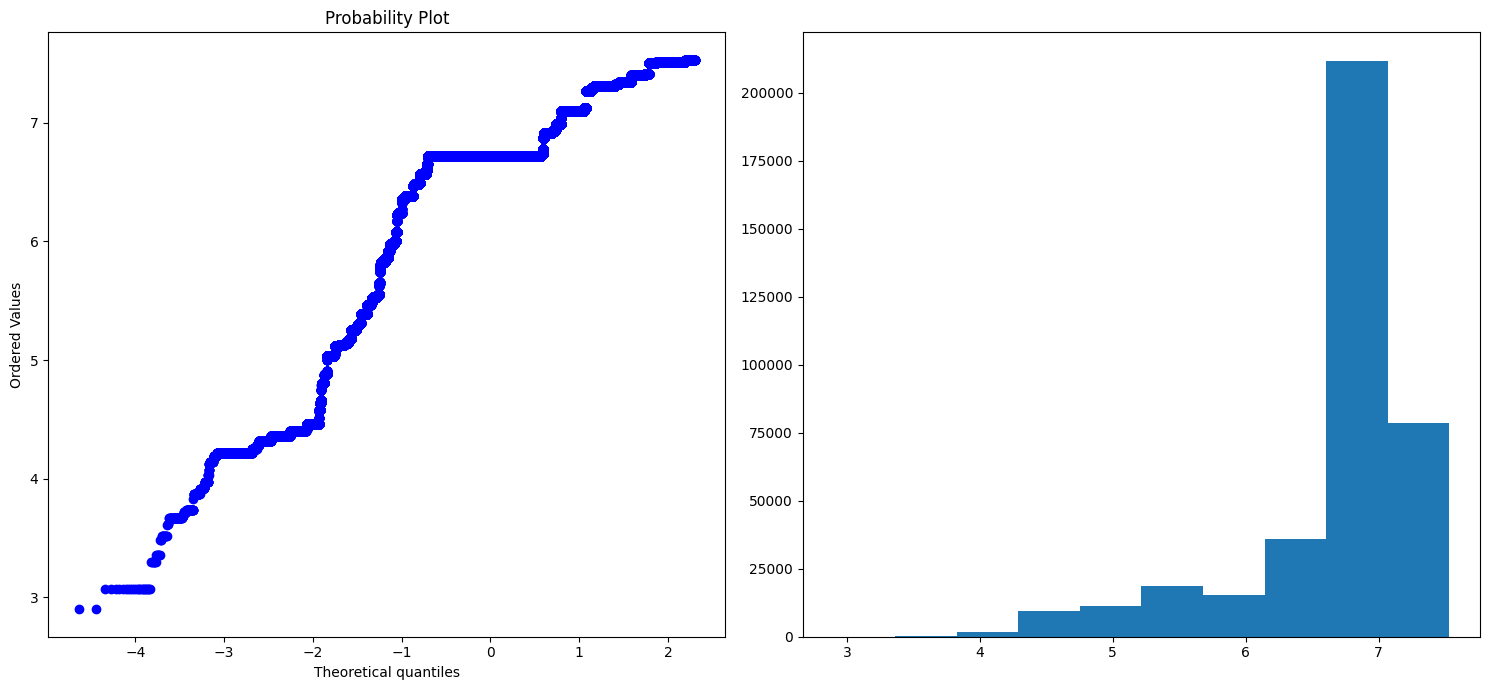

In [148]:
fig = plt.figure(figsize=(15,7))

plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(data['index_of_happiness'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(data['index_of_happiness']) # гистограмма распределения признака

plt.tight_layout() 

plt.show() 

In [149]:
"""Распределение признака не похоже на нормальное и логнормальное, поэтому заполним пропуски 
средними значениями"""
data['index_of_happiness'] = data['index_of_happiness'].fillna(data['index_of_happiness'].mean())

#Удалим лишний признак
data.drop(columns='countries', inplace=True)

Text(0.5, 1.0, 'Взаимосвязь между "Позитивностью" и оценкой')

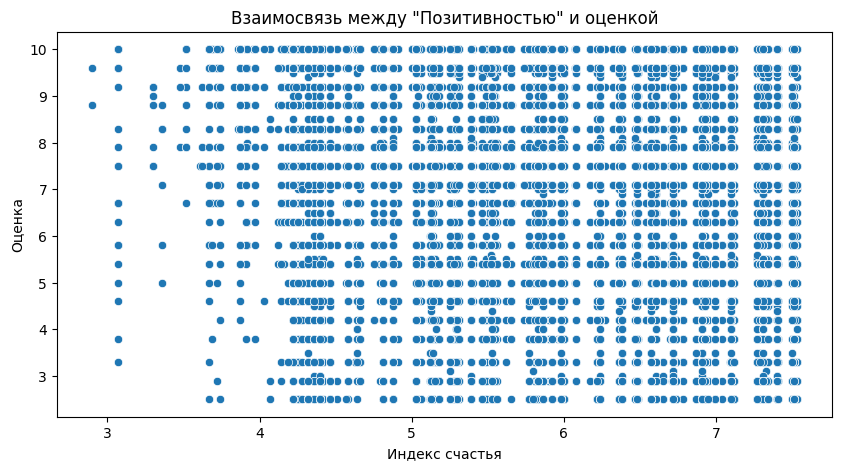

In [150]:
fig = plt.figure(figsize=(10, 5))

scatterplot = sns.scatterplot(
    data=data,
    x='index_of_happiness',
    y='reviewer_score')
plt.xlabel('Индекс счастья')
plt.ylabel('Оценка')
plt.title('Взаимосвязь между "Позитивностью" и оценкой')

**Между индексом счастья и выставляемой оценкой не прослеживается**

In [151]:
#Если внимательно рассмотреть признак 'reviewer_nationality', то можно обнаружить прупущенные значения
(f"В признаке reviewer_nationality имеются пропущенных {data[data['reviewer_nationality'] ==''].shape[0]} строк, необозначенных как NaN")

'В признаке reviewer_nationality имеются пропущенных 395 строк, необозначенных как NaN'

In [152]:
#Заменим пустые строки на NaN
data['reviewer_nationality'] = data['reviewer_nationality'].replace (["^\s*$"], np.NaN, regex=True)
#Заменим NaN на unknown
data['reviewer_nationality'] = data['reviewer_nationality'].fillna('unknown')

#### **Создадим списки по континентам либо по ментальным и религиозным показателям:**

In [153]:
#Список по европейским странам (территориально)
europe = ['United Kingdom','Poland','France','Switzerland','Bulgaria',
          'Sweden','Luxembourg','Netherlands', 'Jersey', 'Italy', 'Ireland',
          'Portugal','Germany','Austria','Ukraine','Finland', 'Denmark','Spain', 
          'Israel', 'Cyprus', 'Gibraltar', 'Slovakia','Iceland', 'Norway',
          'Isle of Man', 'Greece','Slovenia', 'Serbia', 'Czech Republic', 'Hungary', 
          'Latvia','Estonia','Malta','Bosnia and Herzegovina','Russia', 'Guernsey',
          'Croatia','Lithuania','Montenegro', 'Belarus', 'Monaco','Kosovo',
          'Andorra', 'Albania','Moldova', 'Faroe Islands','Liechtenstein', 'Anguilla',
          'Crimea', 'Svalbard Jan Mayen','Vatican City','San Marino', 'Romania',
         'Belgium', 'Macedonia']

#Список по азиатским странам (территориально, туда могут входить страны с разными религиозными странами)
asia =  ['China', 'Hong Kong', 'Singapore','Thailand', 'Indonesia','Sri Lanka','Malaysia',
         'India', 'Vietnam','Brunei', 'Philippines','Taiwan','Bangladesh','Macau', 'Mongolia',
         'Myanmar','Maldives','Cambodia', 'Laos', 'Nepal', 'East Timor','Japan', 'Bhutan',
        'South Korea']
#Список по Северной Америке, исключаем страны, с латиноамериканским населением
north_ameriсa = ['United States of America', 'Canada', 'United States Minor Outlying Islands',
                'St Pierre and Miquelon','U S Virgin Islands']

#Список государств Океании                         
oceania = ['Fiji','Australia', 'Kiribati', 'Wallis and Futuna','New Zealand','Guam', 
           'New Caledonia','Tuvalu','Cook Islands', 'Palau', 'Samoa','Papua New Guinea',
           'American Samoa', 'Cocos K I','French Polynesia','Northern Mariana Islands',
           'Antarctica','Vanuatu']

#Мусульманские страны Ближнего Востока, Передней Азии и Средней Азии, Северной Африки
muslim_countries = ['Lebanon', 'United Arab Emirates', 'Pakistan','Iran', 'Kuwait', 
                    'Bahrain','Oman', 'Turkey','Egypt', 'Qatar', 'Saudi Arabia','Jordan',
                    'Kazakhstan','Morocco', 'Azerbaijan','Iraq','Syria',
                    'Libya','Algeria','Yemen','Palestinian Territory','Turkmenistan', 
                    'Uzbekistan','Kyrgyzstan','Tajikistan','Afghanistan','Mauritania',
                    'Tunisia']

#Латиноамериканские страны Северной и Южной Америк
latin_america = ['Mexico','Brazil', 'Chile', 'Puerto Rico', 'Colombia', 'Argentina', 
                 'Costa Rica','Peru','Venezuela', 'Paraguay','Bahamas','Panama', 
                 'Dominica', 'Guatemala','Ecuador','Barbados', 'Bolivia','El Salvador', 
                 'Nicaragua','Cayman Islands','Cura ao','U S Virgin Islands','Saint Lucia', 
                 'Jamaica','Belize','Honduras','Aruba','Uruguay','Suriname', 
                 'Falkland Islands Malvinas','Turks Caicos Islands','Saint Kitts and Nevis',
                 'Dominican Republic','St Maarten','British Virgin Islands','Martinique',
                 'Montserrat','Antigua Barbuda','Guadeloupe','Haiti','Saint Martin',
                 'Saint Vincent Grenadines','French Guiana','Guyana',
                 'Bonaire St Eustatius and Saba','Saint Barts','Grenada','Trinidad and Tobago']

#Африканские страны
africa = ['South Africa','Nigeria','Gabon','Mauritius','Bermuda','Sudan', 
          'Ghana','Seychelles','Kenya','Zimbabwe','Rwanda','Namibia','Tanzania',
          'Mali','Zambia', 'Ethiopia','Ivory Coast','Senegal','Angola','Burundi',
          'Uganda','Benin', 'Gambia','Botswana','Malawi','Niger','Djibouti', 
          'Mozambique', 'Guinea','Comoros','Togo','Congo','Liberia',
          'Equatorial Guinea','Sierra Leone','Swaziland','South Sudan',
          'Reunion','Somalia','Democratic Republic of the Congo',
          'Eritrea','Cameroon','Central Africa Republic','Cape Verde',
          'Madagascar','Lesotho']

#Немусульманские страны Передней Азии и Ближнего Востока
anterior_asia = ['Israel', 'Georgia', 'Armenia', 'Abkhazia Georgia']


In [154]:
def country_search(country):
    '''Функция преобразования в категории по континентам
    и религиозным взглядам по странам, скоторых
    происходят рецензенты'''
    if country in europe:
        return 'Europe'
    elif country in asia:
        return 'Asia'
    elif country in north_ameriсa:
        return 'North America'
    elif country in oceania:
        return 'Oceania'
    elif country in muslim_countries:
        return 'Muslim countries'
    elif country in latin_america:
        return 'Latin America'
    elif country in africa:
        return 'Africa'
    elif country in anterior_asia:
        return 'Anterior Asia'
    else:
        return 'unknown'

In [155]:
#Применяем функцию и образуем новый признак 'continent_reviewer'
data['continent_reviewer'] = data['reviewer_nationality'].apply(country_search)

Text(0, 0.5, 'Континенты')

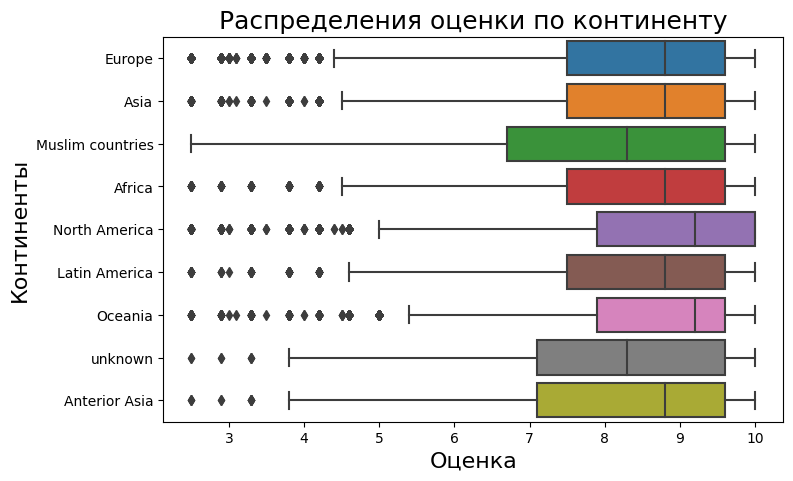

In [156]:
#Построим график распределения оценки по континентам
plt.figure(figsize=(8,5))
box = sns.boxplot(data=data, y='continent_reviewer',x='reviewer_score')
box.set_title('Распределения оценки по континенту', fontsize = 18)
box.set_xlabel('Оценка', fontsize=16)
box.set_ylabel('Континенты',fontsize=16)

In [157]:
#Удалим столбец национальность рецензента
data.drop(columns = ['reviewer_nationality'],inplace=True)

In [158]:
#Кодируем признак континента, чтобы он был пригоден для обучения
encoder = ce.OneHotEncoder(cols=['continent_reviewer'],use_cat_names=True)
type_bin = encoder.fit_transform(data['continent_reviewer'])
data = pd.concat([data,type_bin], axis=1)

In [159]:
def clean_text(text):
    '''Функция для очистки текста, 
    убираем пробелы, приводим к нижнему регистру, 
    убираем скобки,знаки препинания'''
    text = text.strip().lower()
    text = re.sub(r'[^\w\s]','',text)
    text = re.sub(r'\d*$', '', text)
    text = re.sub(r'[()]', '', text)
    return text

In [160]:
#Применим преобразование к двум столбцам
data['negative_review'] = data['negative_review'].apply(clean_text)
data['positive_review'] = data['positive_review'].apply(clean_text)

In [161]:
#посмотрим 50 самых популярных негативных отзывов
data['negative_review'].value_counts()[:50]

negative_review
no negative                       95833
nothing                           15874
n a                                1392
none                               1115
                                    609
nothing really                      493
small room                          424
all good                            419
breakfast                           396
location                            392
no complaints                       385
everything                          329
nothing at all                      328
nothing to dislike                  288
price                               260
nil                                 259
small rooms                         229
na                                  205
everything was perfect              202
absolutely nothing                  182
can t think of anything             180
leaving                             178
everything was great                174
very small room                     166
nothing to complain abou

In [162]:
#Также посмотрим на 50 самых популярных позитивных отзывов
data['positive_review'].value_counts()[:50]

positive_review
no positive                      26863
location                          8831
everything                        2453
nothing                           1295
great location                    1289
the location                      1185
good location                     1122
breakfast                          591
friendly staff                     544
excellent location                 476
staff                              418
location and staff                 341
location staff                     315
location location location         256
location was good                  243
location was great                 242
everything was perfect             240
comfy bed                          225
good breakfast                     222
perfect location                   212
the staff                          207
location is great                  202
location is good                   188
all                                182
clean                              181
very frie

**Можем заметить, что на самом деле в негативных отзывах скрываются и положительные отзывы и, то, что самые популярные отзывы не являются многословными, можно сделать замену отзывов таких как 'no negative или no positive и похожие отзывы на их синонимы, такие как positive и negative соответственно**

In [163]:
#для начала сформируем списки для обоих призаков
positive = ['no negative', 'nothing','none','n a', 'all good', 'no complaints','na','non','no']
negative = ['no positive', 'nothing']

#Замена слов на по списку на их синонимы 'Positive' и 'Negative'
data['negative'] = data['negative_review'].replace(positive, 'Positive')
data['positive'] = data['positive_review'].replace(negative, 'Negative')

In [164]:
#Посмотрим, что получилось
data['negative'].value_counts()[:10]

negative
Positive              115465
                         609
nothing really           493
small room               424
breakfast                396
location                 392
everything               329
nothing at all           328
nothing to dislike       288
price                    260
Name: count, dtype: int64

In [165]:
data['positive'].value_counts()[:10]

positive
Negative              28158
location               8831
everything             2453
great location         1289
the location           1185
good location          1122
breakfast               591
friendly staff          544
excellent location      476
staff                   418
Name: count, dtype: int64

(-0.5, 999.5, 799.5, -0.5)

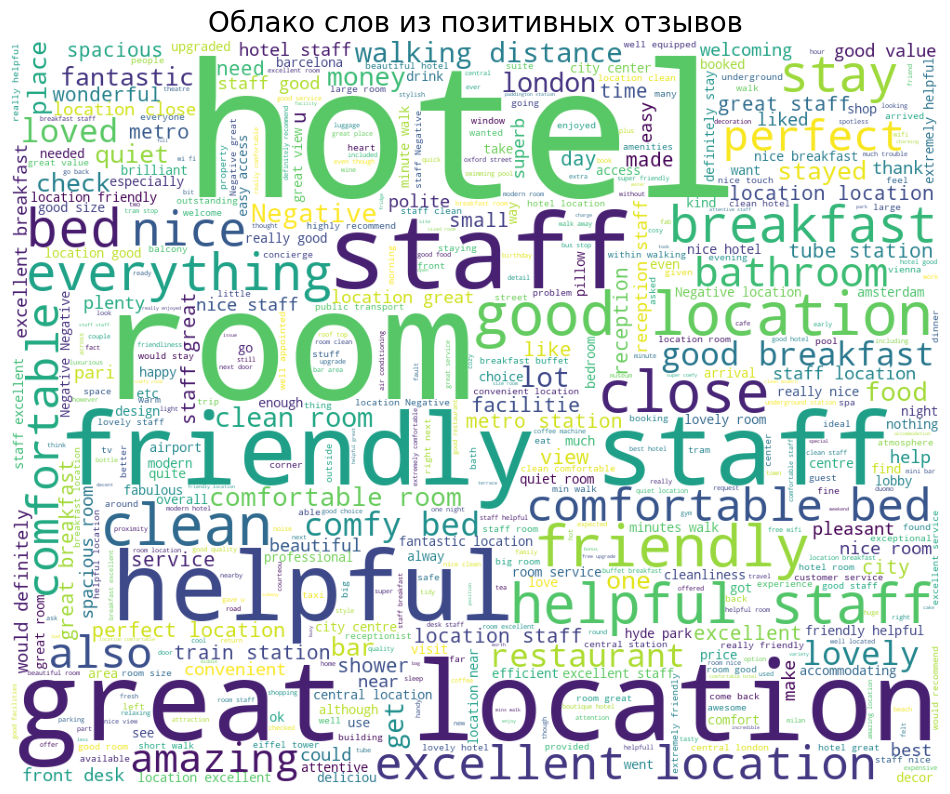

In [166]:
#Делаем визуализацию 'Облако слов по позитивным отзывам'
stopWords = set(stopwords.words('english'))

wordcloud = WordCloud(background_color='white',
                     stopwords=stopWords,
                     max_words=500,
                     max_font_size=200,
                     width=1000, height=800,
                    random_state=42,).generate(' '.join(data['positive'].astype(str)))
fig = plt.figure(figsize=(12,14))
plt.imshow(wordcloud)
plt.title('Облако слов из позитивных отзывов', fontsize=20)
plt.axis('off')
                      

(-0.5, 999.5, 799.5, -0.5)

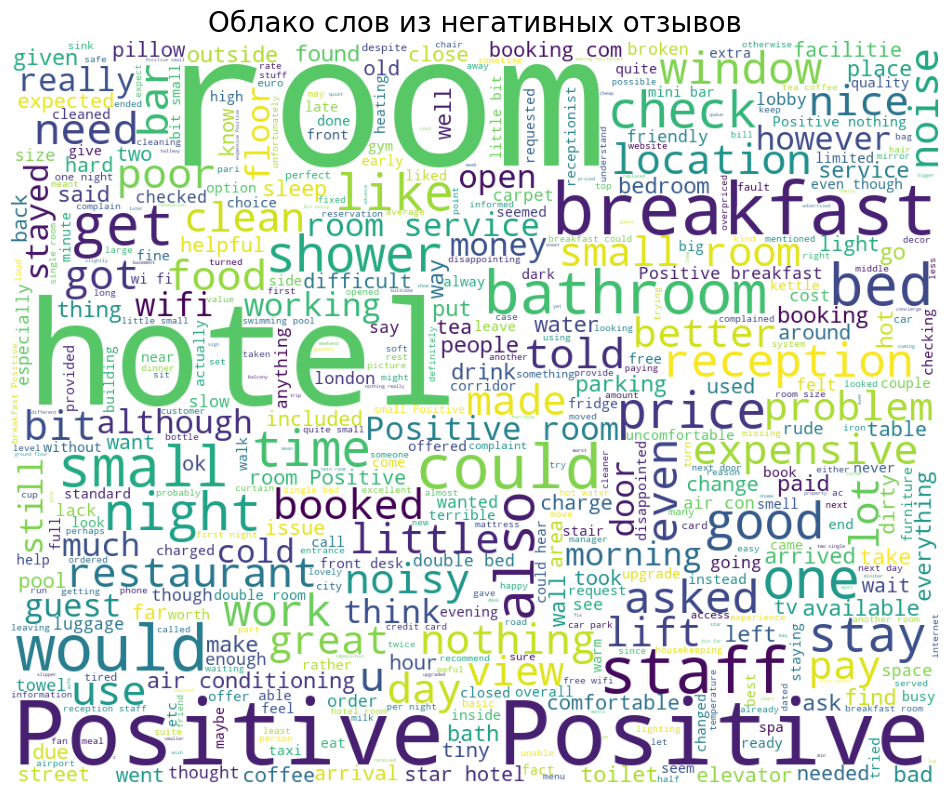

In [167]:
# Делаем облако слов по негативным отзывам
wordcloud = WordCloud(background_color='white',
                     stopwords=stopWords,
                     max_words=500,
                     max_font_size=200,
                     width=1000, height=800,
                    random_state=42,).generate(' '.join(data['negative'].astype(str)))
fig = plt.figure(figsize=(12,14))
plt.imshow(wordcloud)
plt.title('Облако слов из негативных отзывов', fontsize=20)
plt.axis('off')

**Теперь наглядно видно, поскольку данная визуализация стрится на том, что крупным шрифтом в ней указываются самые частотные слова, позитивные слова: *hotel,room,clean,friendly staff,helpful*
Среди негативных частотных слов можно выделить: *Positive, hotel,breakfast,room,expensive*
Можно заметить, что в целом по датасету отзывы-позитивные**

#### Анализ тональности текста положительных и отрицательных отзывов

In [168]:
# создаем два экземпляра анализатора, чтобы разделить лексикон 
# для разной системы оценки положительных и отрицательных отзывов:
pos = SentimentIntensityAnalyzer()
neg = SentimentIntensityAnalyzer()

#добавим контекст
neg.lexicon.update({'small': -1, 'old': -1})
pos.lexicon.update({'everything': 10, 'good': 10})

#После преобразования получаем словарь из оценки негативности ('neg'), нейтральности('neu')
#позитивности(pos), общая оценка тональности('compound')
data['neg_scores'] = data['negative'].apply(lambda x: neg.polarity_scores(x))
data['pos_scores'] = data['positive'].apply(lambda x: pos.polarity_scores(x))

In [169]:
#Получаем 8 новых признаков, по 4 на каждый признак, распакуя словарь
data['neg_review_neg'] = data['neg_scores'].apply(
    lambda x: x['neg'])
data['neg_review_neu'] = data['neg_scores'].apply(
    lambda x: x['neu'])
data['neg_review_pos'] = data['neg_scores'].apply(
    lambda x: x['pos'])
data['neg_review_compound'] = data['neg_scores'].apply(
    lambda x: x['compound'])

data['pos_review_neg'] = data['pos_scores'].apply(
    lambda x: x['neg'])
data['pos_review_neu'] = data['pos_scores'].apply(
    lambda x: x['neu'])
data['pos_review_pos'] = data['pos_scores'].apply(
    lambda x: x['pos'])
data['pos_review_compound'] = data['pos_scores'].apply(
    lambda x: x['compound'])

#### Тэги

In [170]:
'''Тэги представляют собой на первый взягляд список тэгов,
но на самом деле это строковый тип, состоящий из множества пробелов,
избавимся от лишних символов и пробелов'''
data['tags'] = data['tags'].apply(lambda x: x.replace('[','').replace(']','')\
                            .replace("'",'').strip().replace(' ,', ',').\
                                 replace(',  ',', ').split(','))

#с помощью модуля Collections выведем 50 самых частотных тэгов
tags_list=[]
for elem in data['tags']:
    for tag in elem:
        tag = tag.strip()
        tags_list.append(tag)
c = Counter(tags_list)
c.most_common(50)


[('Leisure trip', 313353),
 ('Submitted from a mobile device', 230608),
 ('Couple', 189046),
 ('Stayed 1 night', 145296),
 ('Stayed 2 nights', 100176),
 ('Solo traveler', 81166),
 ('Stayed 3 nights', 71940),
 ('Business trip', 61934),
 ('Group', 49057),
 ('Family with young children', 45810),
 ('Stayed 4 nights', 35708),
 ('Double Room', 26386),
 ('Standard Double Room', 24150),
 ('Superior Double Room', 23518),
 ('Family with older children', 19787),
 ('Deluxe Double Room', 18612),
 ('Double or Twin Room', 16824),
 ('Stayed 5 nights', 15592),
 ('Standard Double or Twin Room', 13058),
 ('Classic Double Room', 12604),
 ('Superior Double or Twin Room', 10238),
 ('2 rooms', 9278),
 ('Stayed 6 nights', 7388),
 ('Standard Twin Room', 7325),
 ('Single Room', 7225),
 ('Twin Room', 6278),
 ('Stayed 7 nights', 5541),
 ('Executive Double Room', 4763),
 ('Classic Double or Twin Room', 4569),
 ('Superior Twin Room', 4530),
 ('Club Double Room', 4485),
 ('Deluxe Double or Twin Room', 4463),
 ('Quee

Из представленных тэгов можно выделить семь новых признаков:

* Цель поездки (туристическая поездка или деловая)
* Отправлено с мобильного телефона
* Совместно с кем была поездка
* На сколько ночей остановился постоялец
* Тип номера
* Тип номера по размеру
* Есть ли домашнее животное

In [171]:
trip_list = ['Leisure trip','Business trip']
def trip_transformation(tag_list):
    '''Функция выделяющая из тегов цель поездки'''
    for trip in trip_list:
        for tag in tag_list:
            if trip.lower() == tag.lower().strip():
                return tag.strip()
            

def submission_transformassion(tag_list):
    '''Выделение "Отправлено с мобильного телефона"'''
    for tag in tag_list:
        if 'Submitted' in tag:
            return tag.strip()

#Создадим список из способа совместного путешествия, для использования в функции
travel_list = ['Couple', 'Solo traveler', 'Group', 'Family with young children', 
               'Family with older children', 'Travelers with friends']

def travel_transformation(tag_list):
    '''Функция для создания признака совместной поездки'''
    for elem in travel_list:
        for item in tag_list:
            if elem.lower() == item.lower().strip():
                return item.strip()

def quantity_nights(tag_list):
    '''Функция для создания признака количества ночей'''
    for night in tag_list:
        if 'Stayed' in night and night is not None:
            night = night.strip()
            return night

#Список типа комнат для использования функции
room_list = ['Standard','Deluxe', 'Superior','Executive', 'Suite', 'Studio', 
             'Apartment','Premium',
            'Business']

def room_type(tag_list):
    '''Функция для создания признака типа комнат'''
    for room in room_list:
        for item in tag_list:
            if room.lower() in item.lower().strip():
                return room

#Список размеров комнат
size_room_list = ['Double', 'Triple', 'Twin', 'Single', 'Quadruple'] 
def room_size(tag_list):
    '''Функция для создания признака размера комнат'''
    for room in size_room_list:
        for item in tag_list:
            if room.lower() in item.lower().strip():
                return room   

def pet(tag_list):
    '''Функция для создания признака наличия домашнего животного'''
    for pet in tag_list:
        if 'With a pet' in pet.strip():
            return 1
        else:
            return 0
            

In [172]:
'''Создадим 7 новых признаков, применяя функции к признаку "tags"'''
#Тип поездки
data['type_of_trip'] = data['tags'].apply(trip_transformation)
data['type_of_trip'].fillna(value=np.nan,inplace=True)
data['type_of_trip'].fillna(data['type_of_trip'].mode()[0],inplace=True)

#Отправлено ли с мобильного телефона
data['submitted_by'] = data['tags'].apply(submission_transformassion)
data['submitted_by'].fillna(value=np.nan, inplace=True)
data['submitted_by'].fillna('Submitted not from a mobile device',inplace=True)

#Совместно с кем осуществлена поездка
data['joint_travel'] = data['tags'].apply(travel_transformation)

#Создание и преобразование признака количества ночей
data['quantity_nights'] = data['tags'].apply(quantity_nights)
data['quantity_nights'] = data['quantity_nights'].apply(lambda x: int(x.split()[1]) \
                                                        if x is not None else 0)

#Тип комнат
data['type_of_room'] = data['tags'].apply(room_type)
data['type_of_room'].fillna(value=np.nan, inplace=True)
data['type_of_room'].fillna('Other type of room',inplace=True)

#Размер комнат
data['size_room'] = data['tags'].apply(room_size)
data['size_room'].fillna(value=np.nan, inplace=True)
data['size_room'].fillna('Other size of room',inplace=True)

#Есть ли домашнее животное
data['pet'] = data['tags'].apply(pet)

Text(0, 0.5, 'Оценка')

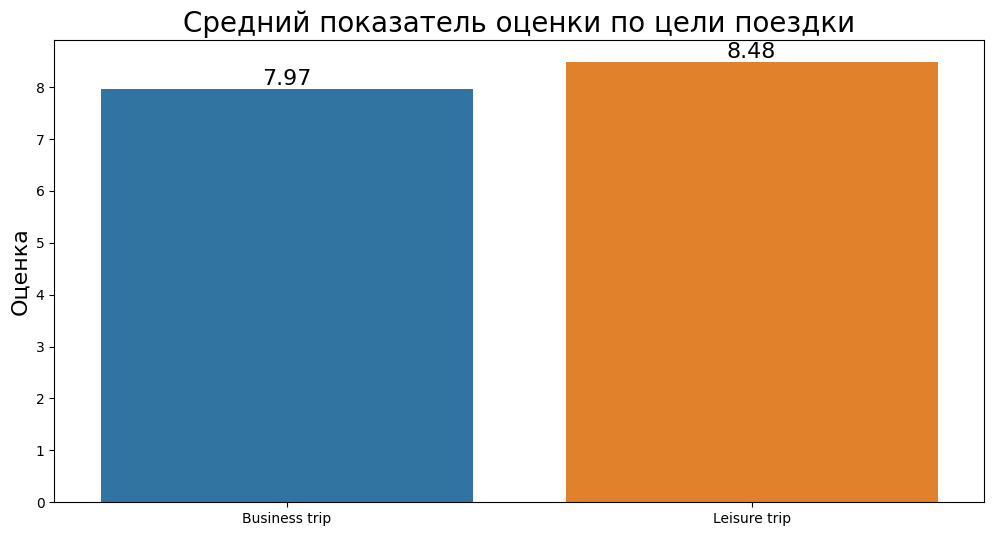

In [173]:
trip = data.groupby(['type_of_trip'])['reviewer_score'].mean().reset_index()
#Визуализируем отношение типа поездки со средней оценкой
fig, ax = plt.subplots(figsize=(12, 6))
trip_plot = sns.barplot(data=trip, x='type_of_trip',y='reviewer_score')
for p in ax.patches:
    ax.annotate(
        '{:.2f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
    ha='center', va='bottom', fontsize=16)
trip_plot.set_title('Средний показатель оценки по цели поездки', fontsize = 20)
trip_plot.set_xlabel('')
trip_plot.set_ylabel('Оценка',fontsize=16)

**Строже оценивают, кто приехал с деловой поездкой**

In [174]:
# Произведем замену на бинарные значения
data['type_of_trip'] = data['type_of_trip'].replace(['Leisure trip','Business trip'],[1,0])

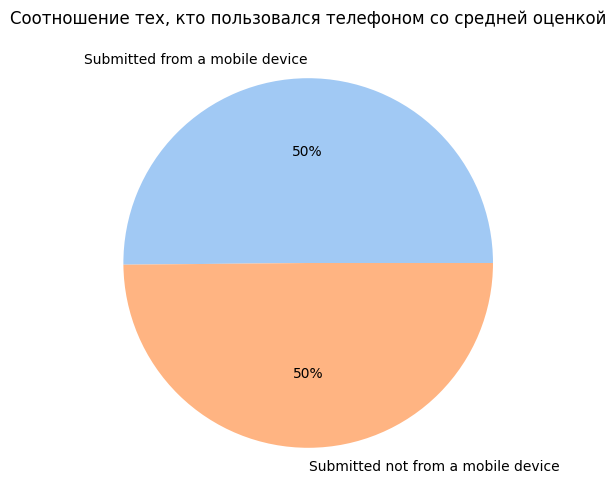

In [175]:
#Визуализация соотношения средней оценки с теми, кто пользовался мобильным телефоном, а кто - нет 
mob_data = data.groupby('submitted_by')['reviewer_score'].mean().reset_index()
new = mob_data['reviewer_score']
labels = mob_data['submitted_by']
fig, ax = plt.subplots(figsize=(12, 6))

colors = sns.color_palette('pastel')[ 0:2 ]


plt.pie(new, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Соотношение тех, кто пользовался телефоном со средней оценкой')
plt.show()

**Соотношение средней оценки у тех, кто пользовался мобильным телефоном, и тех кто не пользовался одинаковое**

In [176]:
#Переведем признак в бинарный 
data['submitted_by'] = data['submitted_by'].apply(lambda x: 1 \
                       if x=='Submitted from a mobile device' else 0)
                                                 

[Text(0, 0, 'Couple'),
 Text(1, 0, 'Family with older children'),
 Text(2, 0, 'Family with young children'),
 Text(3, 0, 'Group'),
 Text(4, 0, 'Solo traveler'),
 Text(5, 0, 'Travelers with friends')]

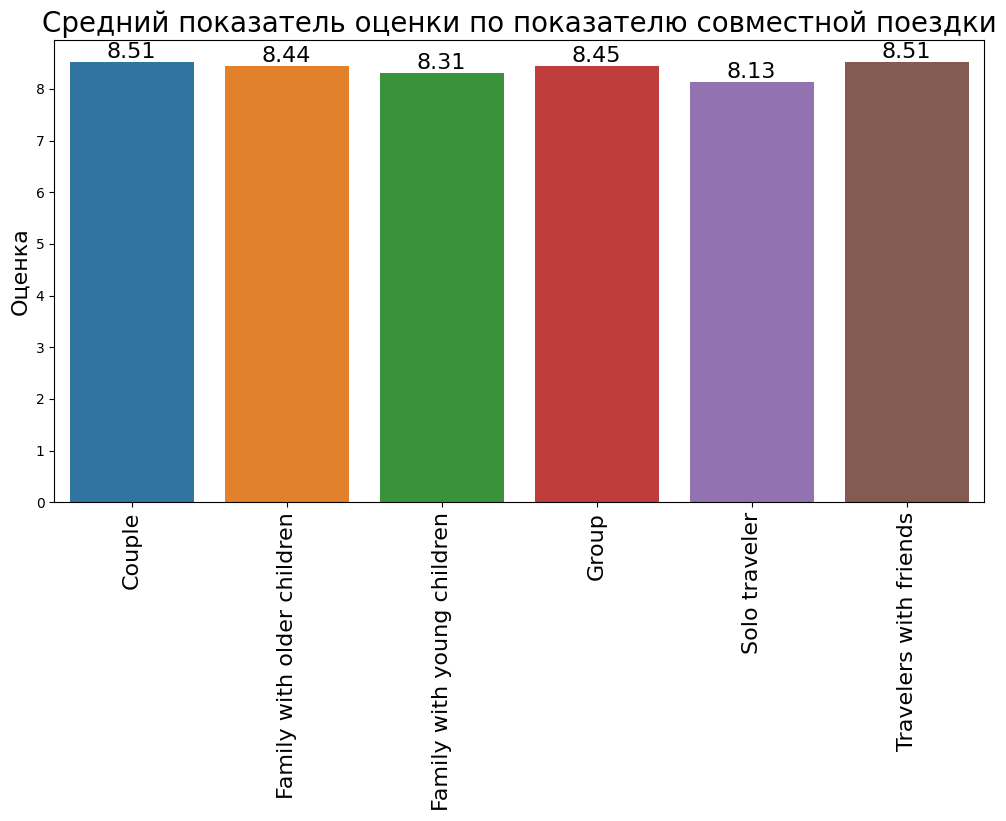

In [177]:
#Сделаем визуализацию соотношения средней оценки и совместно с кем приехал посетитель
joint = data.groupby('joint_travel')['reviewer_score'].mean().reset_index()
fig, ax = plt.subplots(figsize=(12, 6))
joint_plot = sns.barplot(data=joint, x='joint_travel',y='reviewer_score')
for p in ax.patches:
    ax.annotate(
        '{:.2f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
    ha='center', va='bottom', fontsize=16)
joint_plot.set_title('Средний показатель оценки по показателю совместной поездки', fontsize = 20)
joint_plot.set_xlabel('')
joint_plot.set_ylabel('Оценка',fontsize=16)
joint_plot.set_xticklabels(['Couple','Family with older children','Family with young children','Group',
                            'Solo traveler','Travelers with friends'],fontsize=16,rotation=90)


**Строже всех оценивает одиночный постоялец, лояльнее - пара, постояльцы с друзьями**

In [178]:
#Переведем признак в порядковый 
data['joint_travel'] = data['joint_travel'].replace({'Solo traveler': 1,
                      'Couple': 2,
                      'Travelers with friends': 3,
                      'Family with young children': 4,
                      'Family with older children': 5,
                      'Group': 6})

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, '10'),
 Text(11, 0, '11'),
 Text(12, 0, '12'),
 Text(13, 0, '13'),
 Text(14, 0, '14'),
 Text(15, 0, '15'),
 Text(16, 0, '16'),
 Text(17, 0, '17'),
 Text(18, 0, '18'),
 Text(19, 0, '19'),
 Text(20, 0, '20'),
 Text(21, 0, '21'),
 Text(22, 0, '22'),
 Text(23, 0, '23'),
 Text(24, 0, '24'),
 Text(25, 0, '25'),
 Text(26, 0, '26'),
 Text(27, 0, '27'),
 Text(28, 0, '28'),
 Text(29, 0, '29'),
 Text(30, 0, '30')]

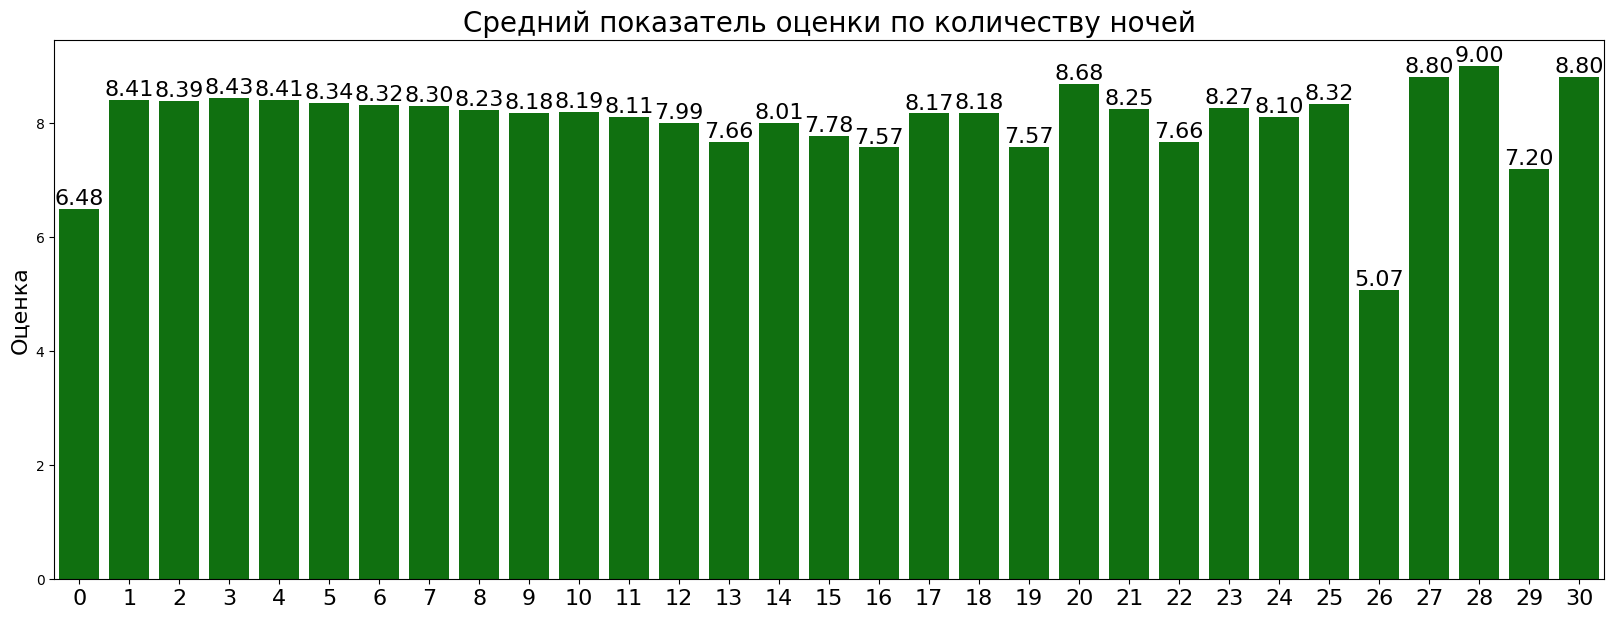

In [179]:
stayed = data.groupby('quantity_nights')['reviewer_score'].mean().reset_index()
fig, ax = plt.subplots(figsize=(20, 7))
stayed_plot = sns.barplot(data=stayed, x='quantity_nights',y='reviewer_score',color='green')
for p in ax.patches:
    ax.annotate(
        '{:.2f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
    ha='center', va='bottom', fontsize=16)
stayed_plot.set_title('Средний показатель оценки по количеству ночей', fontsize = 20)
stayed_plot.set_xlabel('')
stayed_plot.set_ylabel('Оценка',fontsize=16)
stayed_plot.set_xticklabels([i for i in range(0,31)],fontsize=16)

**Высокая оценка поставлена теми, кто остался на 28 ночей, ниже всего у тех, кто оставался на 26 ночей, признак порядковый поэтому дополнительно преобразовывать его, на мой взгляд, не стоит**

[Text(0, 0, 'Apartment'),
 Text(1, 0, 'Business'),
 Text(2, 0, 'Deluxe'),
 Text(3, 0, 'Executive'),
 Text(4, 0, 'Other type of room'),
 Text(5, 0, 'Premium'),
 Text(6, 0, 'Standart'),
 Text(7, 0, 'Studio'),
 Text(8, 0, 'Suite'),
 Text(9, 0, 'Superior')]

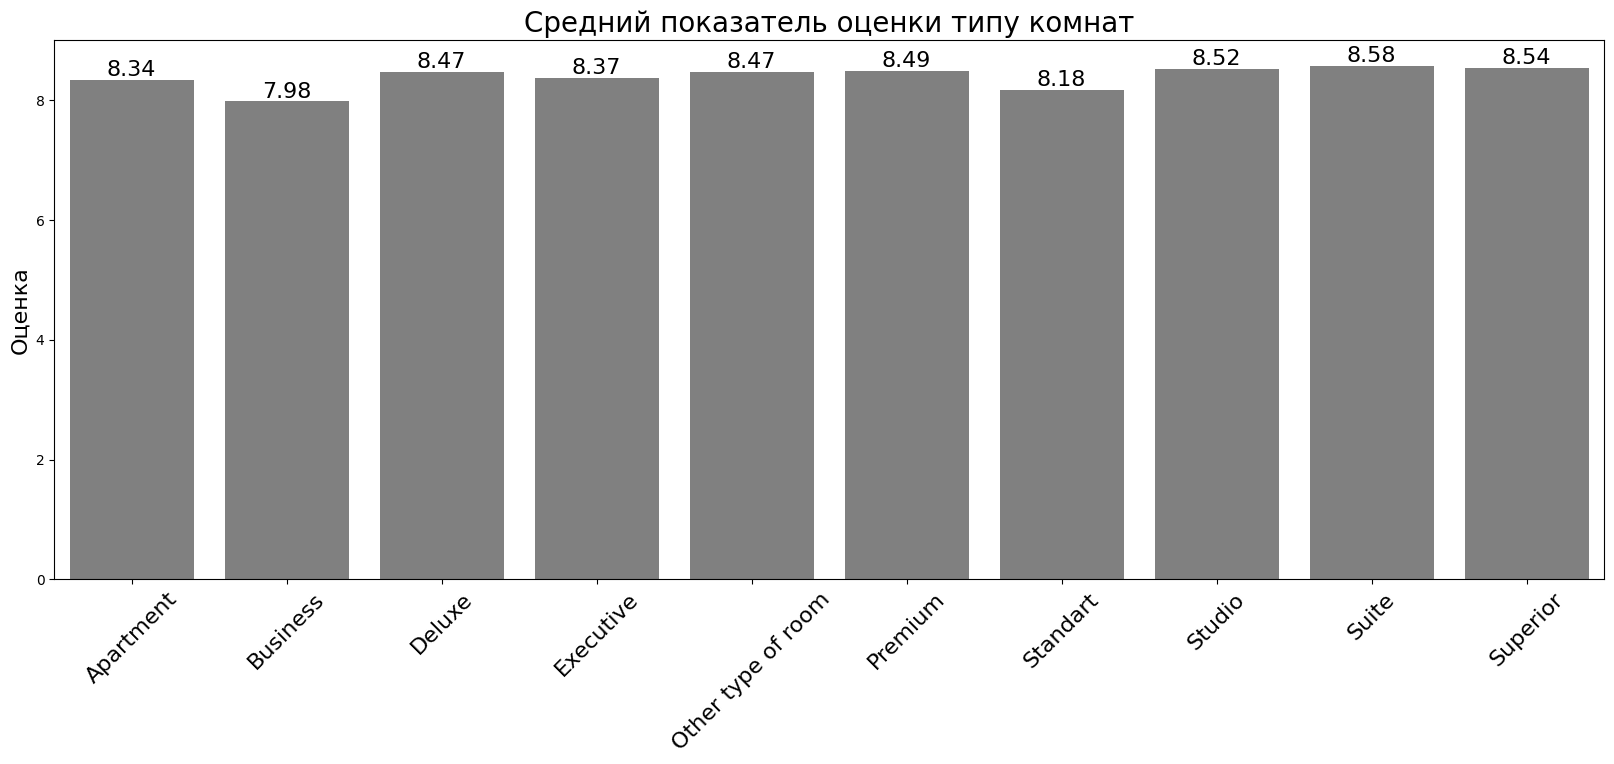

In [180]:
#визуализация зависимости средней оценки от типа комнат
room = data.groupby('type_of_room')['reviewer_score'].mean().reset_index()
fig, ax = plt.subplots(figsize=(20, 7))
room_plot = sns.barplot(data=room, x='type_of_room',y='reviewer_score',color='grey')
for p in ax.patches:
    ax.annotate(
        '{:.2f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
    ha='center', va='bottom', fontsize=16)
room_plot.set_title('Средний показатель оценки типу комнат', fontsize = 20)
room_plot.set_xlabel('')
room_plot.set_ylabel('Оценка',fontsize=16)
room_plot.set_xticklabels(['Apartment','Business','Deluxe','Executive','Other type of room',
                           'Premium','Standart','Studio','Suite','Superior'],fontsize=16,
                         rotation=45)


**Строже оценивают комнаты класса 'Business', чуть выше оценка у посетителей класса 'Standart', выше всех оценивают номера класса 'Suite' (Люкс), Superior(улучшенный)**

[Text(0, 0, 'Double'),
 Text(1, 0, 'Other size of room'),
 Text(2, 0, 'Quadruple'),
 Text(3, 0, 'Single'),
 Text(4, 0, 'Triple'),
 Text(5, 0, 'Twin')]

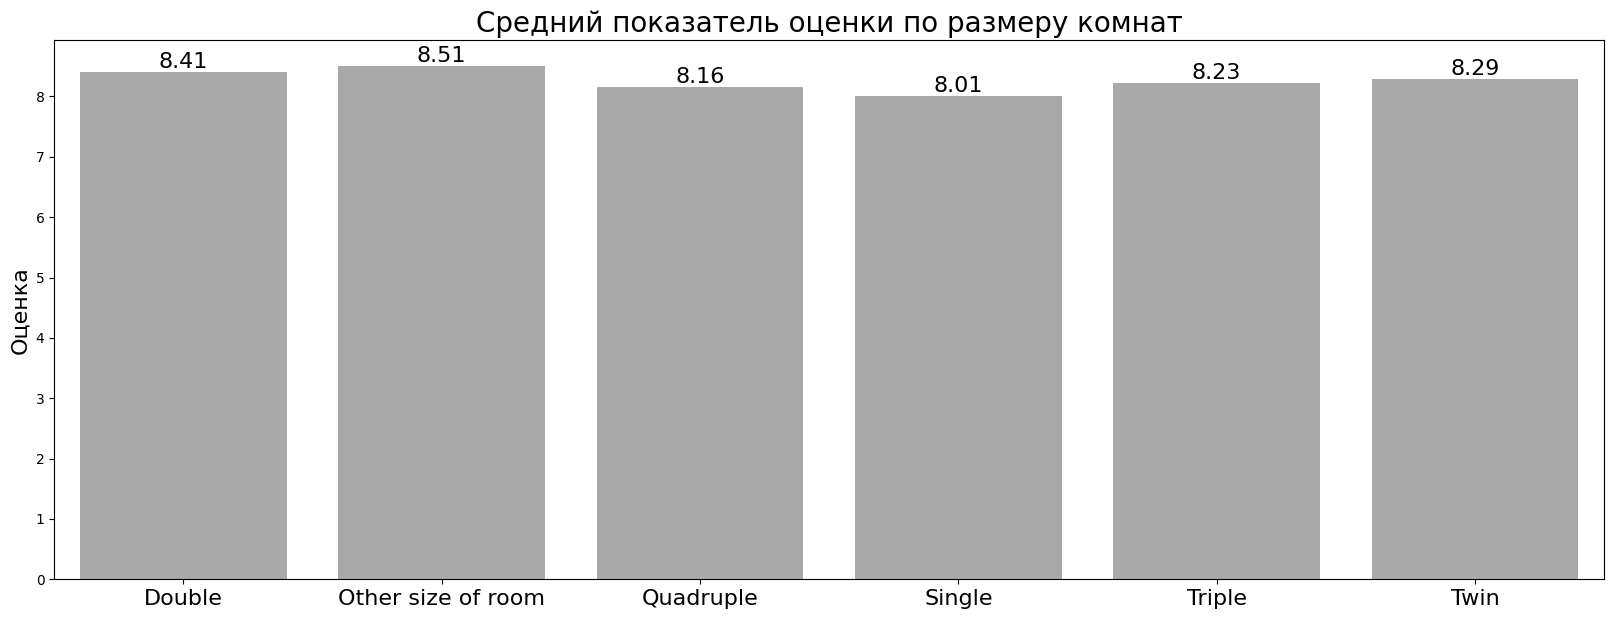

In [182]:
size_room = data.groupby('size_room')['reviewer_score'].mean().reset_index()
fig, ax = plt.subplots(figsize=(20, 7))
size_plot = sns.barplot(data=size_room, x='size_room',y='reviewer_score',color='darkgrey')
for p in ax.patches:
    ax.annotate(
        '{:.2f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
    ha='center', va='bottom', fontsize=16)
size_plot.set_title('Средний показатель оценки по размеру комнат', fontsize = 20)
size_plot.set_xlabel('')
size_plot.set_ylabel('Оценка',fontsize=16)
size_plot.set_xticklabels(['Double','Other size of room', 'Quadruple','Single','Triple',
                          'Twin'],fontsize=16)

[Text(0.5, 1.0, 'Тепловая карта номеров отеля'),
 Text(0.5, 80.7222222222222, 'Размеры комнат'),
 Text(95.7222222222222, 0.5, 'Типы номеров')]

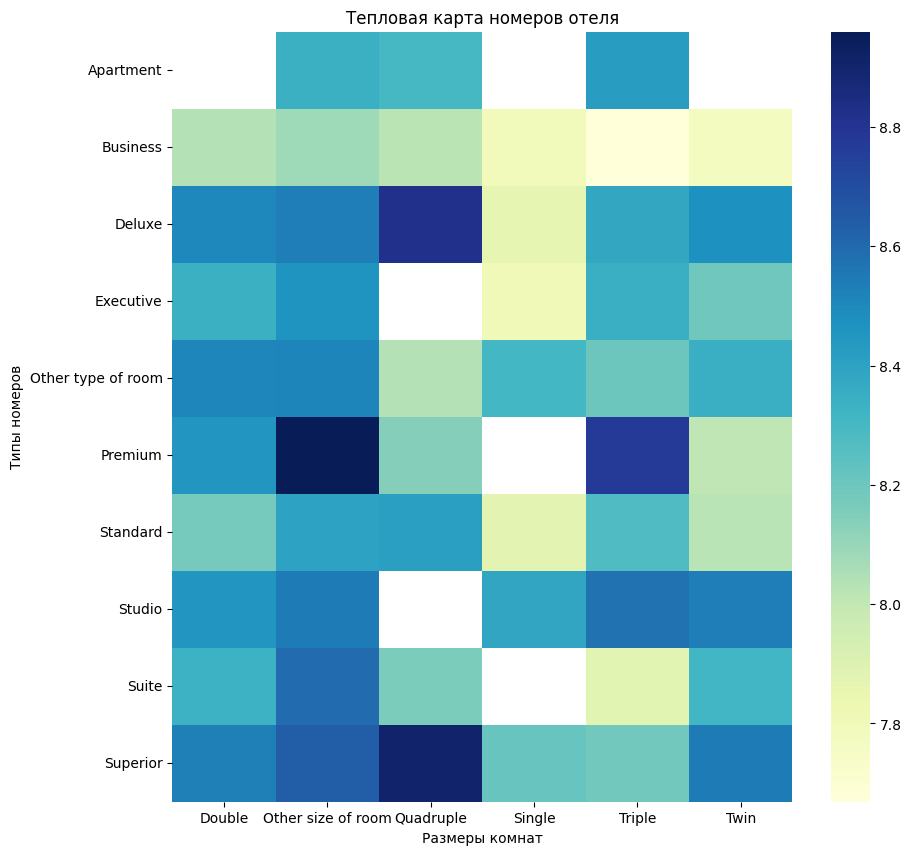

In [183]:
pivot = data.pivot_table(index='type_of_room',
                    values='reviewer_score',
                    columns='size_room',
                    dropna = True,
                    aggfunc = 'mean')
fig, ax = plt.subplots(figsize=(10,10))
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set(title='Тепловая карта номеров отеля', xlabel='Размеры комнат',
            ylabel='Типы номеров')

**Наиболее высокие средние оценки у номеров класса: Superior Quadruple(улучшенный четырехместный номер), Premium с неизвестным размером номера,Premium Triple(трехместный номер премиум класса), Deluxe Quadruple (Делюкс четырехместный). Наименее высокие оценки у номеров класса Business Twin (двухместный номер бизнес-класса с 1 кроватью, Executive Single (Представительский одноместный номер)**

In [184]:
#Кодируем признаки типа номера
encoder = ce.OneHotEncoder(cols=['type_of_room'],use_cat_names=True)
type_bin = encoder.fit_transform(data['type_of_room'])
data = pd.concat([data,type_bin], axis=1)

In [185]:
#Кодируем признаки размера номера
encoder = ce.OneHotEncoder(cols=['size_room'],use_cat_names=True)
type_bin = encoder.fit_transform(data['size_room'])
data = pd.concat([data,type_bin], axis=1)

[Text(0, 0, 'without pet'), Text(1, 0, 'with pet')]

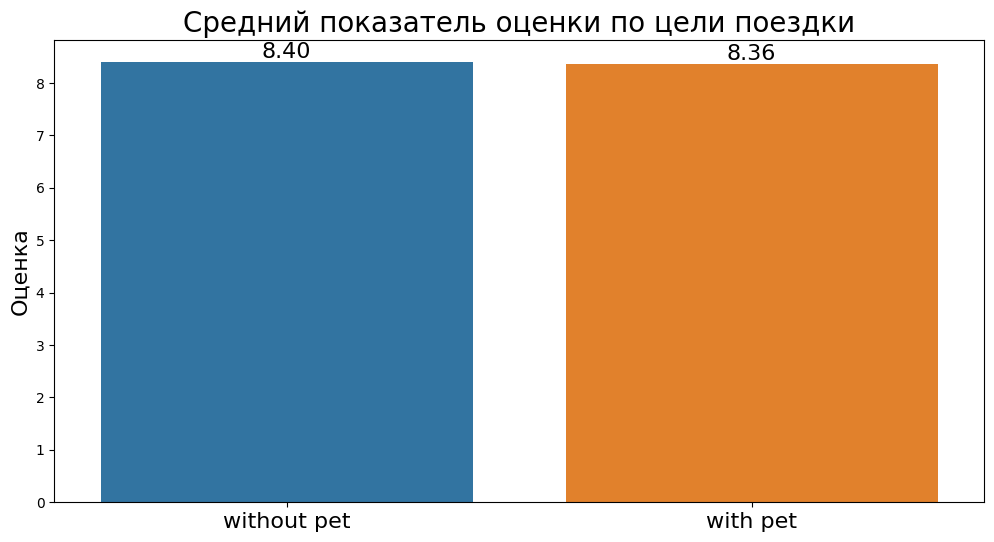

In [186]:
pet = data.groupby('pet')['reviewer_score'].mean().reset_index()
fig, ax = plt.subplots(figsize=(12, 6))
pet_plot = sns.barplot(data=pet, x='pet',y='reviewer_score')
for p in ax.patches:
    ax.annotate(
        '{:.2f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
    ha='center', va='bottom', fontsize=16)
pet_plot.set_title('Средний показатель оценки по цели поездки', fontsize = 20)
pet_plot.set_xlabel('')
pet_plot.set_ylabel('Оценка',fontsize=16)
pet_plot.set_xticklabels(['without pet', 'with pet'],fontsize=16)


**Наличие питомца никак не влияет на среднюю оценку, поставленную посетителем**

### Оценка значимости признаков

In [187]:
#Удалим нечисловые столбцы датасета
obj = [col for col in data.columns if data[col].dtypes=='object']
data.drop(obj, axis=1, inplace=True)

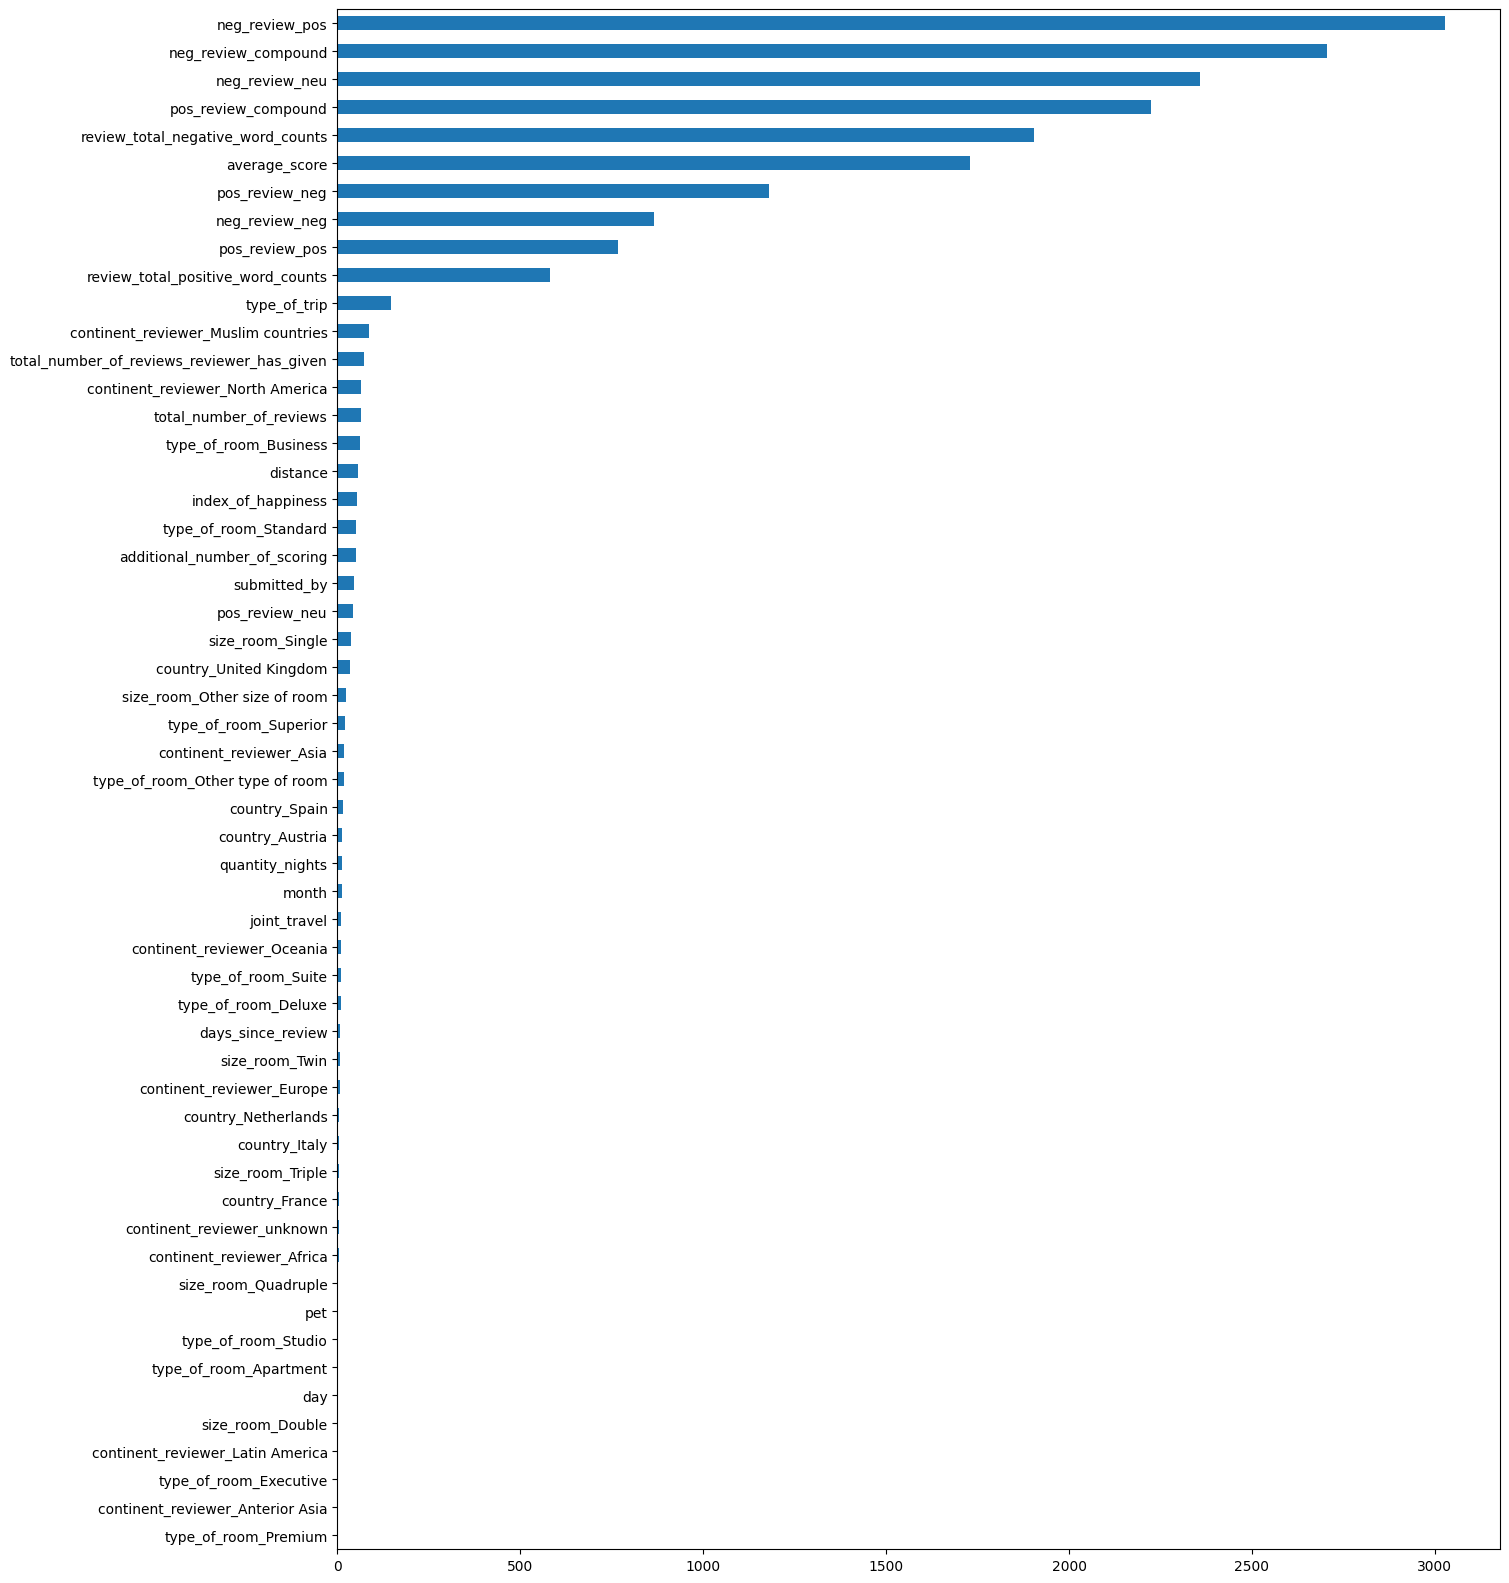

In [188]:
y = data.reviewer_score.values
X = data.drop(['reviewer_score'], axis=1)

# визуализируем результат анализа значимости:
imp_num = pd.Series(f_classif(X[X.columns], y)[0], index = X.columns)
imp_num.sort_values(inplace = True)

fig5, ax5 = plt.subplots(figsize=(15, 20))
imp_num.plot(kind = 'barh');

### Обучение модели и получение предсказания (Model Building):

In [189]:
    # Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
    # Х — данные с информацией об отелях, у — целевая переменная (рейтинги отелей)  
    X = data.drop(['reviewer_score'], axis = 1)  
    y = data['reviewer_score']  
      
    # Загружаем специальный инструмент для разбивки:  
    from sklearn.model_selection import train_test_split  
      
    # Наборы данных с меткой "train" будут использоваться для обучения модели, "test" — для тестирования.  
    # Для тестирования мы будем использовать 25 % от исходного датасета.  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [196]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [197]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   52.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.8min finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.9s finished


In [198]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAPE:', metrics.mean_absolute_error(y_test, y_pred))

MAPE: 0.8599116300129364


<Axes: >

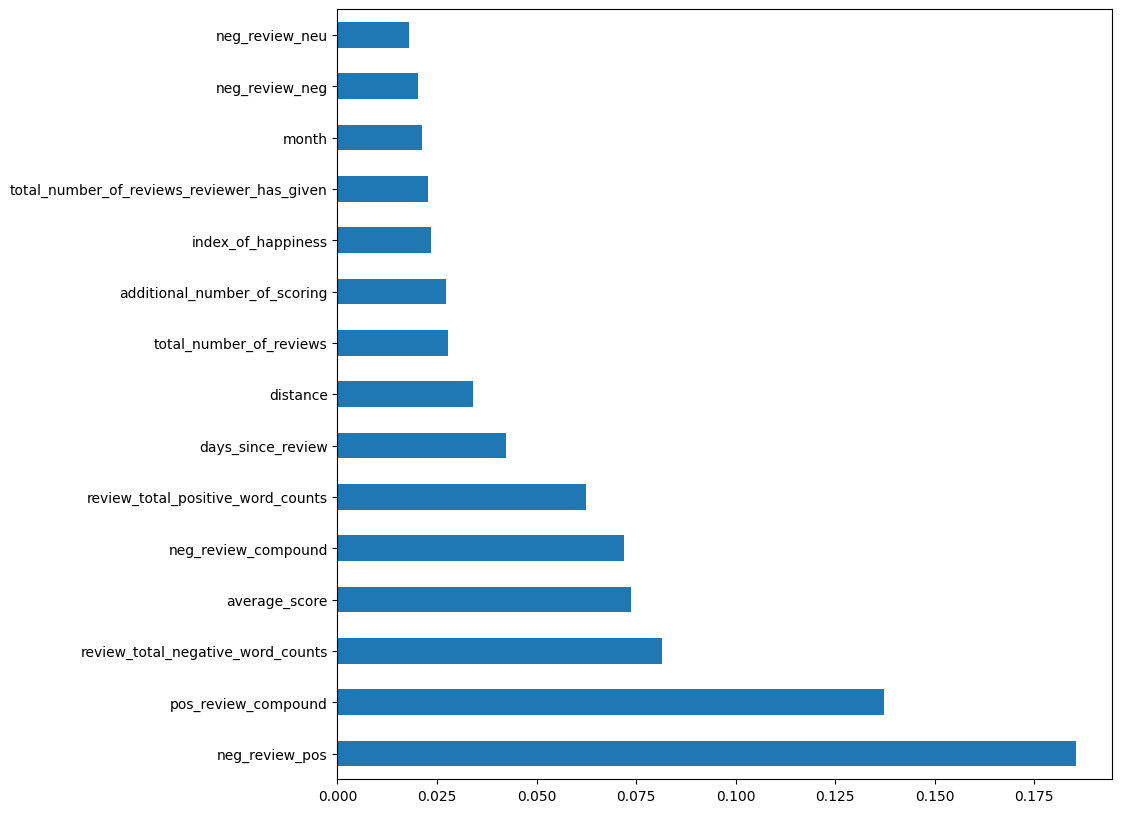

In [199]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

**Значимыми признаками оказались показатели, получившиеся с помощью модуля преобразования тональности текста (nltk)**